In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
#ok for this instead of predicting the raw values we will predict the difference of the target from the mean

In [40]:
train = pd.read_csv('Data/train_data_new.csv')
test = pd.read_csv('Data/test_data_new.csv')
# train = pd.read_csv('Data/train_data_new.csv', usecols=['file', 'sample','ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'FLOATMAG_ACC_ADC_PORT_0', 'DAC_FLOATMAG_BH'])
# test = pd.read_csv('Data/test_data_new.csv', usecols=['file', 'sample','ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'FLOATMAG_ACC_ADC_PORT_0', 'DAC_FLOATMAG_BH'])

train, test

(        sample  CMD_POS_FLOATMAG_BH  ENC_POS_FLOATMAG_BH  POS_ERR_FLOATMAG_BH  \
 0            0                 -3.0                 -3.0                  0.0   
 1            1                 -3.0                 -2.0                 -1.0   
 2            2                 -3.0                 -2.0                 -1.0   
 3            3                 -3.0                 -4.0                  1.0   
 4            4                 -3.0                 -1.0                 -2.0   
 ...        ...                  ...                  ...                  ...   
 188805    7791              99997.0              99998.0                 -1.0   
 188806    7792              99997.0              99998.0                 -1.0   
 188807    7793              99997.0              99998.0                 -1.0   
 188808    7794              99997.0              99999.0                 -2.0   
 188809    7795              99997.0              99996.0                  1.0   
 
         DAC_F

In [41]:
train

sample  CMD_POS_FLOATMAG_BH  ENC_POS_FLOATMAG_BH  POS_ERR_FLOATMAG_BH  \
0            0                 -3.0                 -3.0                  0.0   
1            1                 -3.0                 -2.0                 -1.0   
2            2                 -3.0                 -2.0                 -1.0   
3            3                 -3.0                 -4.0                  1.0   
4            4                 -3.0                 -1.0                 -2.0   
...        ...                  ...                  ...                  ...   
188805    7791              99997.0              99998.0                 -1.0   
188806    7792              99997.0              99998.0                 -1.0   
188807    7793              99997.0              99998.0                 -1.0   
188808    7794              99997.0              99999.0                 -2.0   
188809    7795              99997.0              99996.0                  1.0   

        DAC_FLOATMAG_BH  FLOATMAG_ACC_ADC_PORT_0  dENC_X  ddENC_X  \
0                -203.0                   -125.0     NaN      NaN   
1                -209.0                    190.0     1.0      NaN   
2                -206.0                    -77.0     0.0     -1.0   
3                -182.0                     95.0    -2.0     -2.0   
4                -191.0                    -97.0     3.0      5.0   
...                 ...                      ...     ...      ...   
188805            262.0                    -49.0    -3.0     -3.0   
188806            252.0                    -65.0     0.0      3.0   
188807            250.0                     25.0     0.0      0.0   
188808            245.0                    -73.0     1.0      1.0   
188809            261.0                     27.0    -3.0     -4.0   

        rolling_mean_ENC_POS_10  rolling_var_ENC_POS_10  ...  \
0                           NaN                     NaN  ...   
1                           NaN                     NaN  ...   
2                           NaN                     NaN  ...   
3                           NaN                     NaN  ...   
4                           NaN                     NaN  ...   
...                         ...                     ...  ...   
188805                 100000.6                2.266669  ...   
188806                 100000.2                2.622225  ...   
188807                  99999.8                2.622225  ...   
188808                  99999.6                2.488892  ...   
188809                  99999.4                3.600003  ...   

        rolling_mean_POS_ERR_10  rolling_var_POS_ERR_10  \
0                           NaN                     NaN   
1                           NaN                     NaN   
2                           NaN                     NaN   
3                           NaN                     NaN   
4                           NaN                     NaN   
...                         ...                     ...   
188805                     -3.6                2.266667   
188806                     -3.2                2.622222   
188807                     -2.8                2.622222   
188808                     -2.6                2.488889   
188809                     -2.4                3.600000   

        rolling_slope_POS_ERR_10  rolling_mean_POS_ERR_30  \
0                            NaN                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                            NaN                      NaN   
...                          ...                      ...   
188805                  0.181818                -3.200000   
188806                  0.230303                -3.233333   
188807                  0.230303                -2.966667   
188808                  0.193939                -3.066667   
188809                  0.496970                -2.933333

In [42]:
prediction_timestep = 1

train["target"] = train.groupby("file")["FLOATMAG_ACC_ADC_PORT_0"].shift(-prediction_timestep)
test["target"] = test.groupby("file")["FLOATMAG_ACC_ADC_PORT_0"].shift(-prediction_timestep)

In [5]:
# train = train[train["sample"] < 7500]
# test = test[test["sample"] < 7500]

In [43]:


train_columns = train.columns.drop(["file", "sample", "FLOATMAG_ACC_ADC_PORT_0"])

In [44]:
train_columns

Index(['CMD_POS_FLOATMAG_BH', 'ENC_POS_FLOATMAG_BH', 'POS_ERR_FLOATMAG_BH',
       'DAC_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'rolling_mean_ENC_POS_10',
       'rolling_var_ENC_POS_10', 'rolling_slope_ENC_POS_10',
       'rolling_mean_ENC_POS_30', 'rolling_var_ENC_POS_30',
       'rolling_slope_ENC_POS_30', 'rolling_mean_ENC_POS_50',
       'rolling_var_ENC_POS_50', 'rolling_slope_ENC_POS_50', 'dDAC', 'ddDAC',
       'rolling_mean_DAC_10', 'rolling_var_DAC_10', 'rolling_slope_DAC_10',
       'rolling_mean_DAC_30', 'rolling_var_DAC_30', 'rolling_slope_DAC_30',
       'rolling_mean_DAC_50', 'rolling_var_DAC_50', 'rolling_slope_DAC_50',
       'dPOS_ERR', 'ddPOS_ERR', 'rolling_mean_POS_ERR_10',
       'rolling_var_POS_ERR_10', 'rolling_slope_POS_ERR_10',
       'rolling_mean_POS_ERR_30', 'rolling_var_POS_ERR_30',
       'rolling_slope_POS_ERR_30', 'rolling_mean_POS_ERR_50',
       'rolling_var_POS_ERR_50', 'rolling_slope_POS_ERR_50', 'target'],
      dtype='object')

In [45]:
X = train[train_columns].dropna()
y = X.pop("target")
y = np.expand_dims(y, axis=-1)

X_test = test[train_columns].dropna()
y_test = X_test.pop("target")
y_test = np.expand_dims(y_test, axis=1)

In [46]:
X.shape, y.shape, X_test.shape, y_test.shape

((187610, 37), (187610, 1), (36758, 37), (36758, 1))

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Normalization, Dropout

mae = tf.keras.metrics.mean_absolute_error

In [ ]:
#I guess we should probably also calulate the difference from mean for the encoder data aswell due to the large variation in encoder data

In [47]:
input_norm = Normalization(axis=-1)

input_norm.adapt(X)

In [48]:
output_norm = Normalization(axis=-1)

output_norm.adapt(y)

In [100]:
model = Sequential([
    input_norm,
    Dense(200, activation='relu'),
    Dropout(0.2),
    Dense(50, activation = 'relu'),
    Dropout(0.1),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1)  # Output layer with 1 unit
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# model = Sequential([
#     input_norm,
#     Dense(200, activation='relu'),
#     Dense(50, activation = 'relu'),
#     Dense(50, activation='relu'),
#     Dense(20, activation='relu'),
#     Dense(1)  # Output layer with 1 unit
# ])

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [101]:
one_trial_file_index = test["file"].unique()[3] #use 1 for including the second force input phase
print(f"one trial file index: {one_trial_file_index}")

one_trial_columns = list(train_columns)

one_trial_test = test[test["file"] == one_trial_file_index]

X_test_one_trial = one_trial_test[one_trial_columns].dropna()

# y_test_one_trial = X_test_one_trial.pop("target")
# y_test_one_trial = np.expand_dims(y_test_one_trial, axis=1)

# y_mean_one_trial = X_test_one_trial.pop("mean_target")
# y_mean_one_trial = np.expand_dims(y_mean_one_trial, axis=1)

y_target_one_trial = X_test_one_trial.pop("target")
y_target_one_trial = np.expand_dims(y_target_one_trial, axis=1)

one trial file index: 16


In [102]:
X_test_one_trial.shape, y_target_one_trial.shape

((2694, 37), (2694, 1))

In [103]:
inverse_output_norm = Normalization(axis=-1, invert=True)

inverse_output_norm.adapt(y)

In [ ]:
#want to see if it can scale to the second increase aswell (it can)
#want to test the impact of droppout layers
#want to figure out which features are important which are not
#want to figure out the impact of increasing size of nn (n layers and n nodes)



mae reference: 1504.000
epoch 70
Epoch 1/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0128 - mae: 0.0778 - val_loss: 0.0154 - val_mae: 0.0867
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0135 - mae: 0.0776 - val_loss: 0.0151 - val_mae: 0.0873
Epoch 3/4
5863/5863 [==============================] - 14s 2ms/step - loss: 0.0127 - mae: 0.0774 - val_loss: 0.0157 - val_mae: 0.0873
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


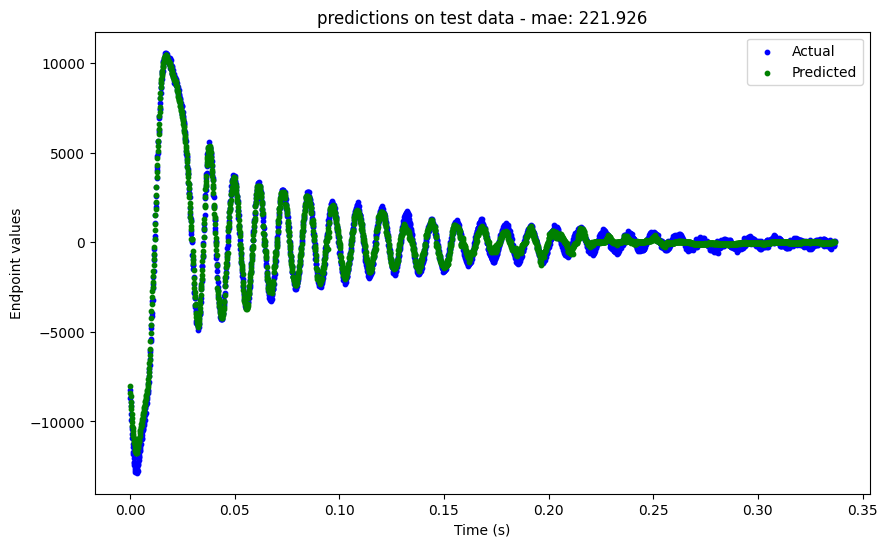

epoch 71
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0129 - mae: 0.0773 - val_loss: 0.0167 - val_mae: 0.0903
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0125 - mae: 0.0773 - val_loss: 0.0163 - val_mae: 0.0895
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0128 - mae: 0.0774 - val_loss: 0.0162 - val_mae: 0.0892
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


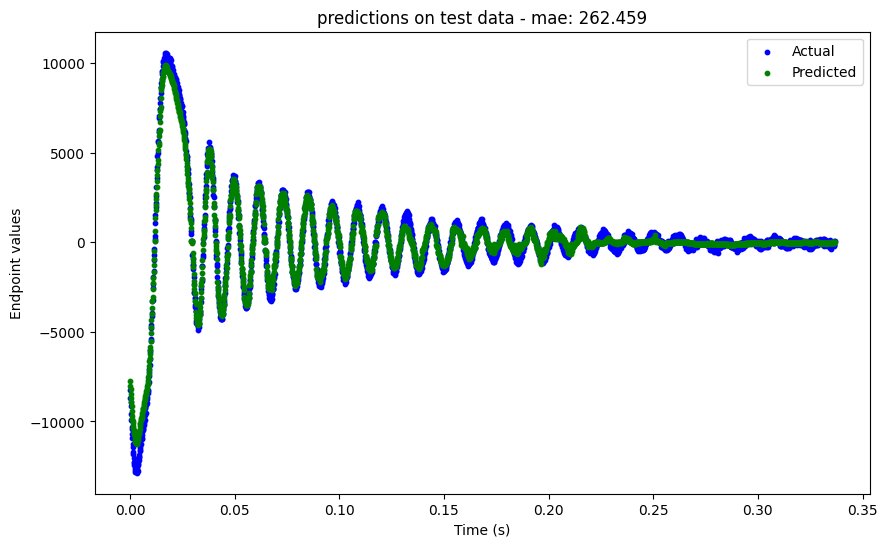

epoch 72
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0127 - mae: 0.0773 - val_loss: 0.0146 - val_mae: 0.0853
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0127 - mae: 0.0772 - val_loss: 0.0194 - val_mae: 0.0929
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0127 - mae: 0.0776 - val_loss: 0.0160 - val_mae: 0.0878
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


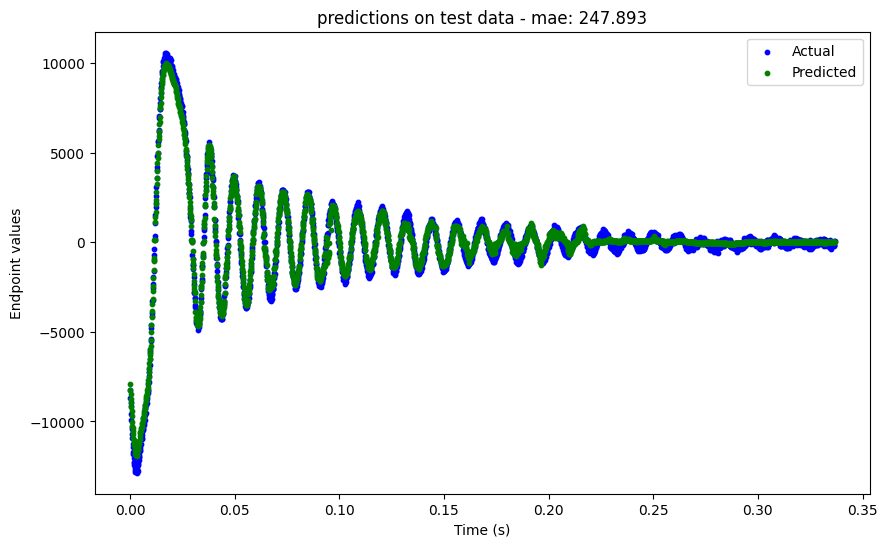

epoch 73
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0132 - mae: 0.0776 - val_loss: 0.0140 - val_mae: 0.0848
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0125 - mae: 0.0772 - val_loss: 0.0175 - val_mae: 0.0914
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0139 - mae: 0.0776 - val_loss: 0.0152 - val_mae: 0.0847
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


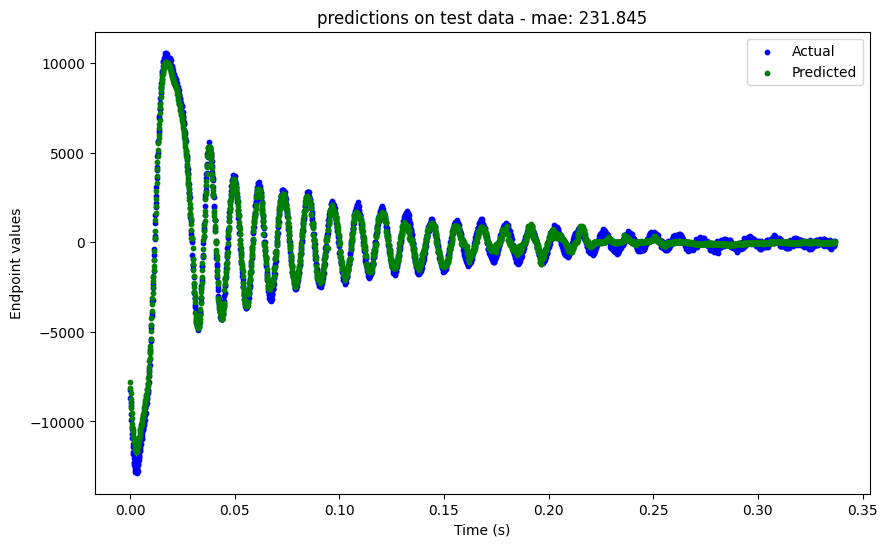

epoch 74
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0127 - mae: 0.0771 - val_loss: 0.0188 - val_mae: 0.0940
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0127 - mae: 0.0771 - val_loss: 0.0208 - val_mae: 0.0957
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0125 - mae: 0.0771 - val_loss: 0.0189 - val_mae: 0.0927
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


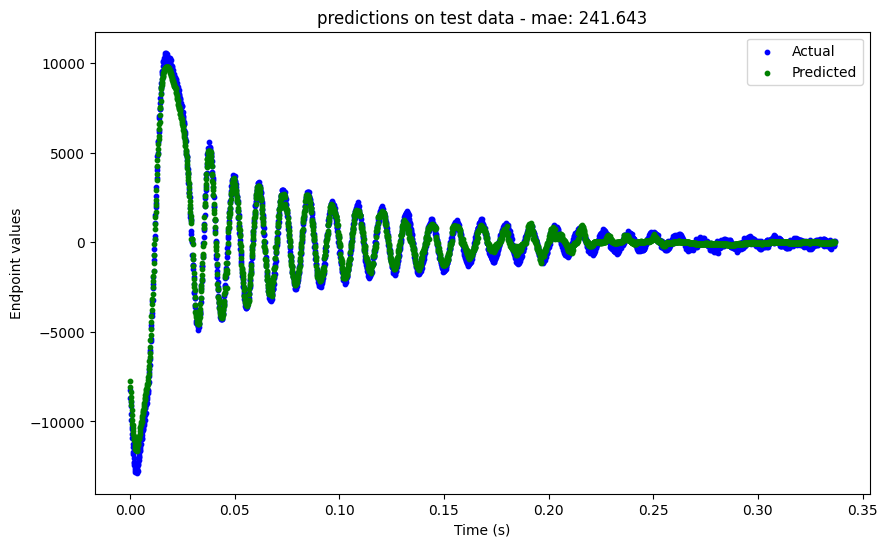

epoch 75
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0128 - mae: 0.0770 - val_loss: 0.0143 - val_mae: 0.0856
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0127 - mae: 0.0771 - val_loss: 0.0190 - val_mae: 0.0941
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0141 - mae: 0.0772 - val_loss: 0.0150 - val_mae: 0.0871
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


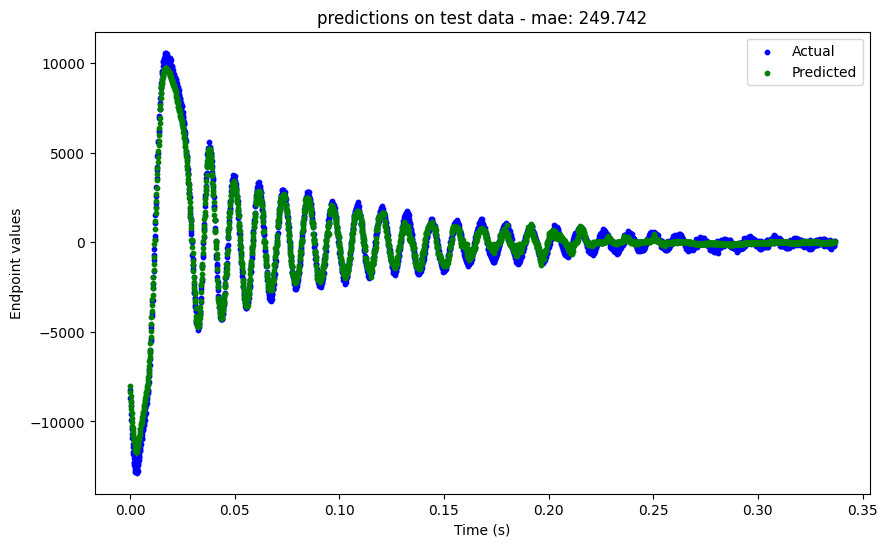

epoch 76
Epoch 1/4
5863/5863 [==============================] - 14s 2ms/step - loss: 0.0128 - mae: 0.0773 - val_loss: 0.0159 - val_mae: 0.0907
Epoch 2/4
5863/5863 [==============================] - 14s 2ms/step - loss: 0.0124 - mae: 0.0770 - val_loss: 0.0148 - val_mae: 0.0849
Epoch 3/4
5863/5863 [==============================] - 14s 2ms/step - loss: 0.0137 - mae: 0.0776 - val_loss: 0.0155 - val_mae: 0.0885
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


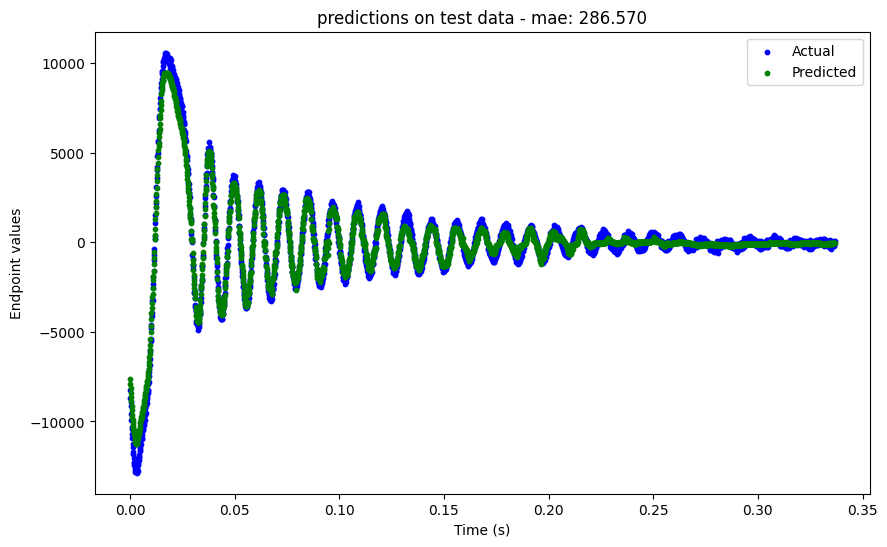

epoch 77
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0124 - mae: 0.0770 - val_loss: 0.0146 - val_mae: 0.0863
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0140 - mae: 0.0774 - val_loss: 0.0139 - val_mae: 0.0854
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0126 - mae: 0.0768 - val_loss: 0.0166 - val_mae: 0.0887
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


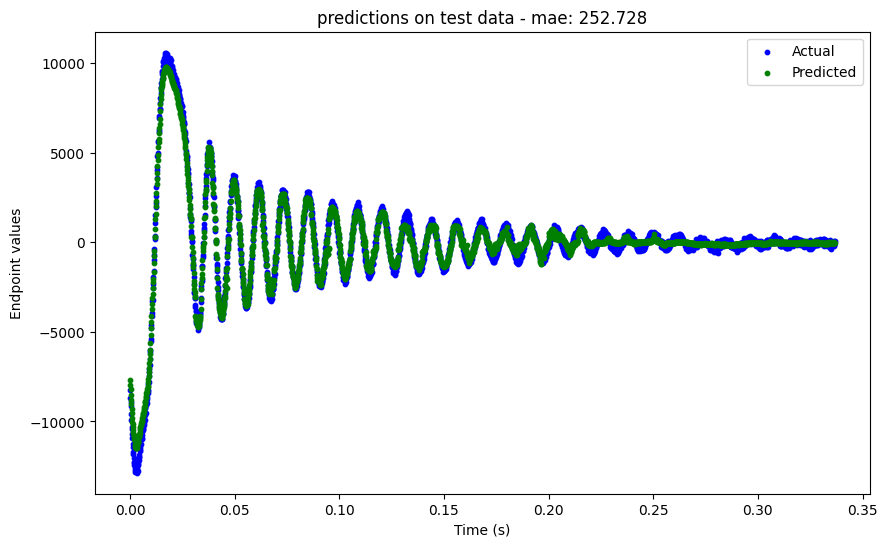

epoch 78
Epoch 1/4
5863/5863 [==============================] - 14s 2ms/step - loss: 0.0127 - mae: 0.0773 - val_loss: 0.0133 - val_mae: 0.0840
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0123 - mae: 0.0769 - val_loss: 0.0137 - val_mae: 0.0829
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0122 - mae: 0.0768 - val_loss: 0.0175 - val_mae: 0.0918
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


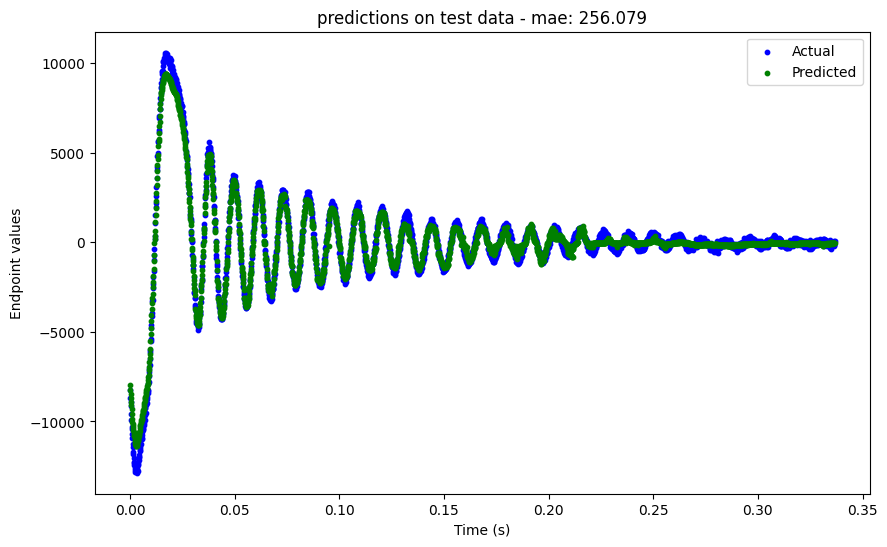

epoch 79
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0133 - mae: 0.0775 - val_loss: 0.0159 - val_mae: 0.0860
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0125 - mae: 0.0769 - val_loss: 0.0174 - val_mae: 0.0890
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0126 - mae: 0.0771 - val_loss: 0.0165 - val_mae: 0.0904
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


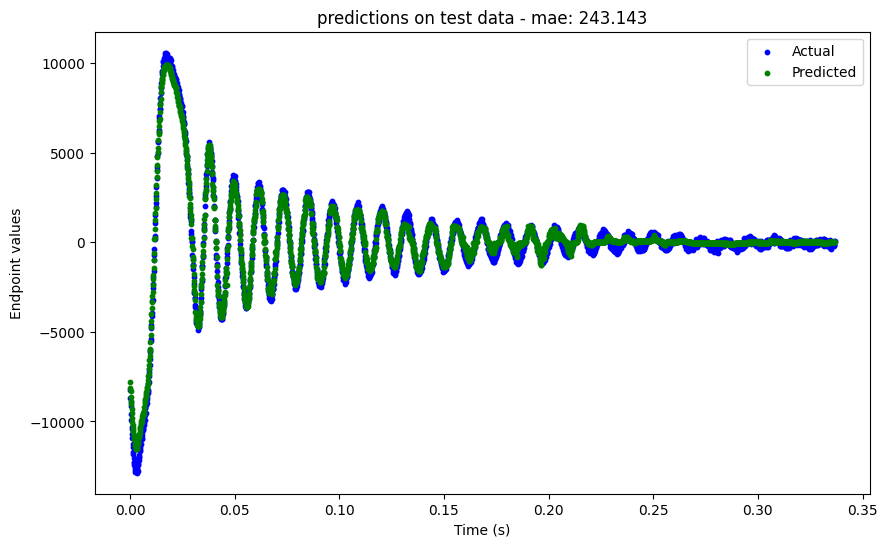

epoch 80
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0124 - mae: 0.0771 - val_loss: 0.0186 - val_mae: 0.0920
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0123 - mae: 0.0768 - val_loss: 0.0159 - val_mae: 0.0877
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0123 - mae: 0.0768 - val_loss: 0.0128 - val_mae: 0.0815
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


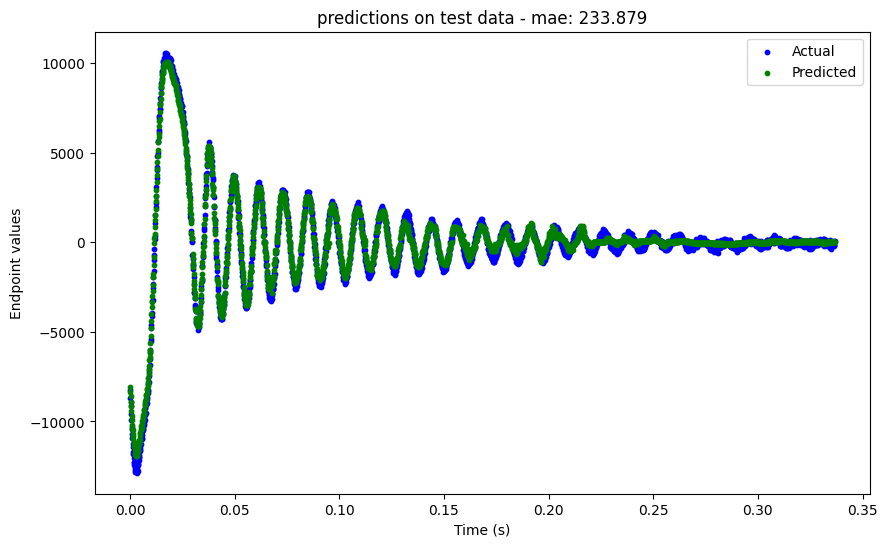

epoch 81
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0124 - mae: 0.0770 - val_loss: 0.0155 - val_mae: 0.0873
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0122 - mae: 0.0767 - val_loss: 0.0148 - val_mae: 0.0849
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0144 - mae: 0.0770 - val_loss: 0.0167 - val_mae: 0.0894
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


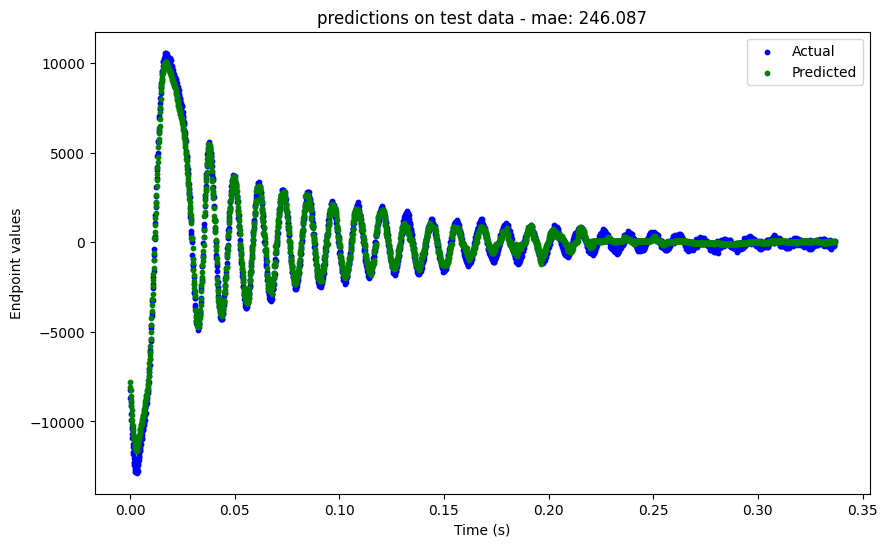

epoch 82
Epoch 1/4
5863/5863 [==============================] - 14s 2ms/step - loss: 0.0123 - mae: 0.0766 - val_loss: 0.0174 - val_mae: 0.0883
Epoch 2/4
5863/5863 [==============================] - 14s 2ms/step - loss: 0.0123 - mae: 0.0768 - val_loss: 0.0183 - val_mae: 0.0929
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0124 - mae: 0.0769 - val_loss: 0.0171 - val_mae: 0.0878
Epoch 4/4
85/85 [==============================] - 0s 948us/step


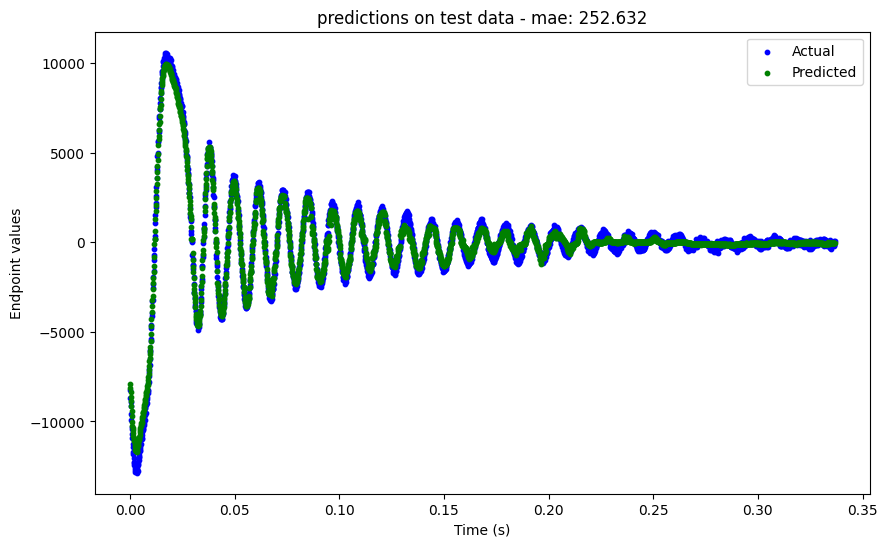

epoch 83
Epoch 1/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0127 - mae: 0.0768 - val_loss: 0.0155 - val_mae: 0.0843
Epoch 2/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0129 - mae: 0.0771 - val_loss: 0.0172 - val_mae: 0.0904
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0125 - mae: 0.0771 - val_loss: 0.0169 - val_mae: 0.0895
Epoch 4/4
85/85 [==============================] - 0s 907us/step


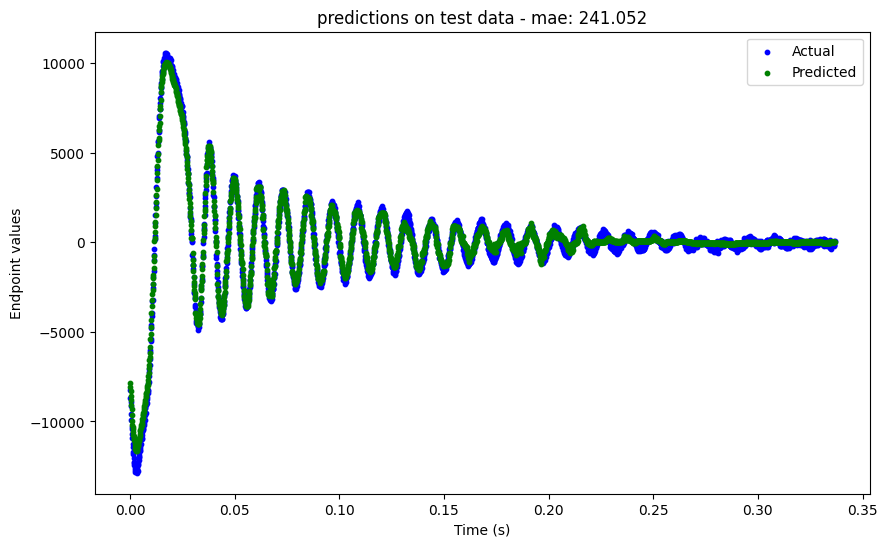

epoch 84
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0123 - mae: 0.0768 - val_loss: 0.0139 - val_mae: 0.0840
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0129 - mae: 0.0771 - val_loss: 0.0163 - val_mae: 0.0887
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0130 - mae: 0.0770 - val_loss: 0.0131 - val_mae: 0.0832
Epoch 4/4
85/85 [==============================] - 0s 906us/step


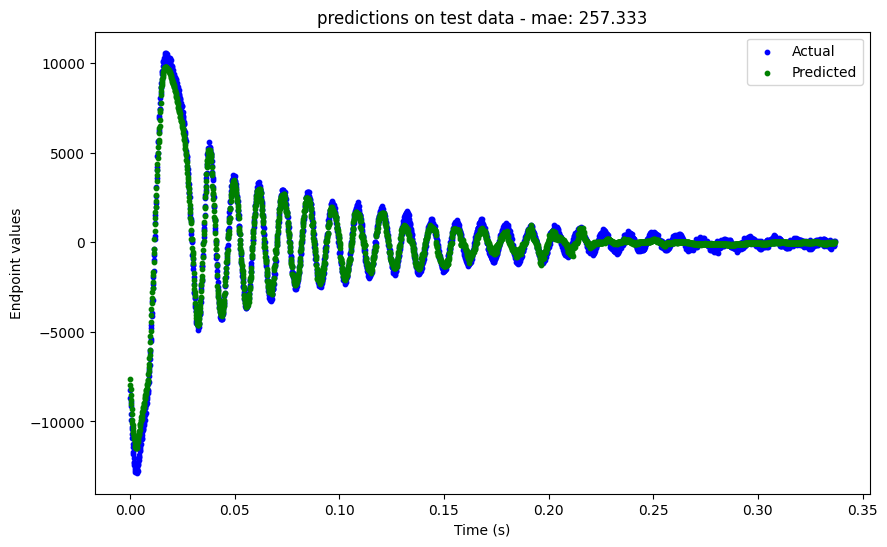

epoch 85
Epoch 1/4
5863/5863 [==============================] - 10s 2ms/step - loss: 0.0127 - mae: 0.0771 - val_loss: 0.0149 - val_mae: 0.0846
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0769 - val_loss: 0.0153 - val_mae: 0.0851
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0146 - mae: 0.0771 - val_loss: 0.0142 - val_mae: 0.0833
Epoch 4/4
85/85 [==============================] - 0s 920us/step


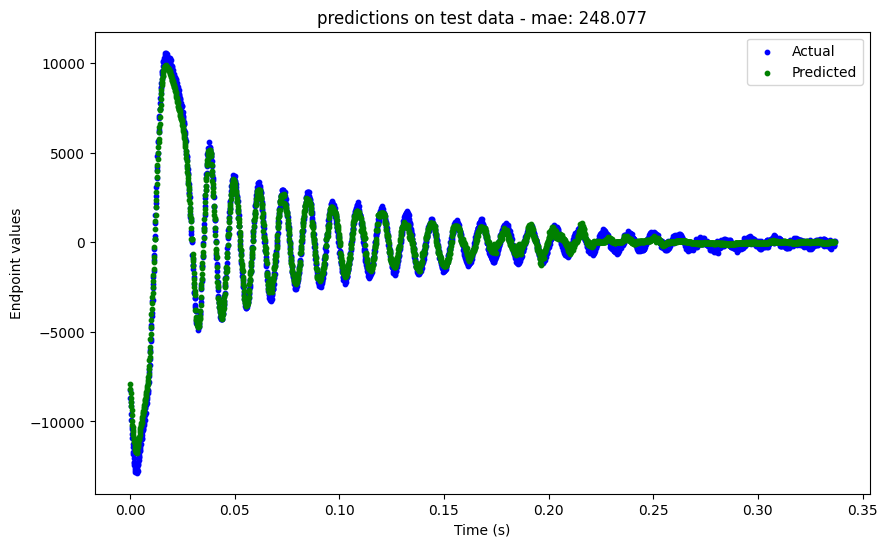

epoch 86
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0126 - mae: 0.0771 - val_loss: 0.0147 - val_mae: 0.0858
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0121 - mae: 0.0767 - val_loss: 0.0165 - val_mae: 0.0900
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0127 - mae: 0.0771 - val_loss: 0.0187 - val_mae: 0.0915
Epoch 4/4
85/85 [==============================] - 0s 923us/step


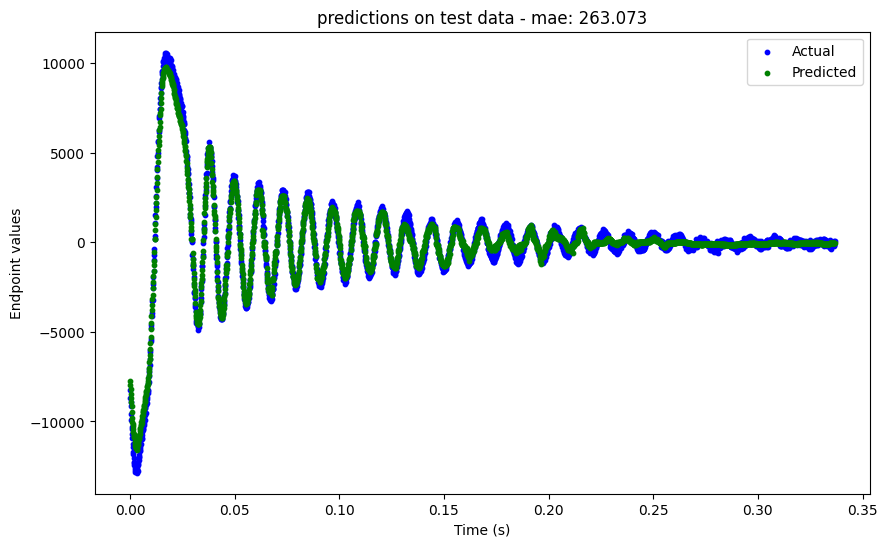

epoch 87
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0125 - mae: 0.0767 - val_loss: 0.0151 - val_mae: 0.0867
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0768 - val_loss: 0.0144 - val_mae: 0.0843
Epoch 3/4
5863/5863 [==============================] - 10s 2ms/step - loss: 0.0125 - mae: 0.0769 - val_loss: 0.0141 - val_mae: 0.0855
Epoch 4/4
85/85 [==============================] - 0s 922us/step


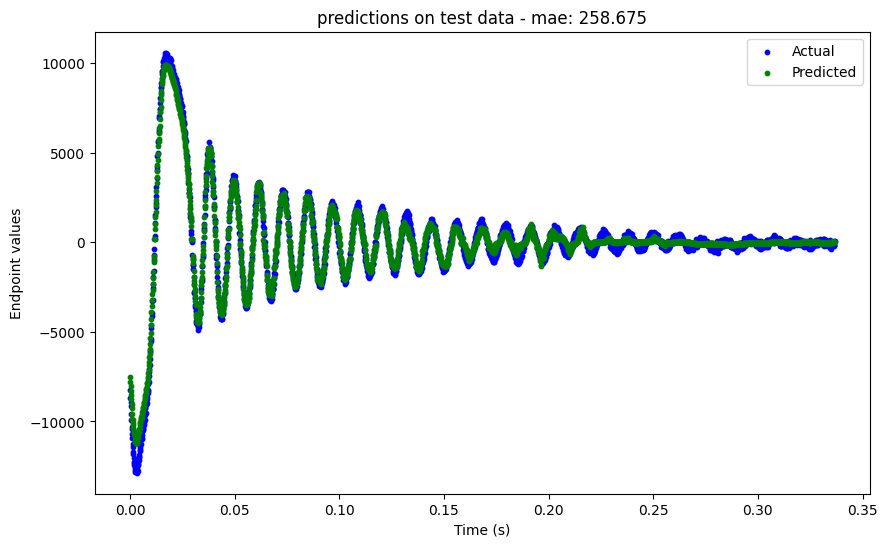

epoch 88
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0129 - mae: 0.0766 - val_loss: 0.0149 - val_mae: 0.0875
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0767 - val_loss: 0.0163 - val_mae: 0.0880
Epoch 3/4
5863/5863 [==============================] - 10s 2ms/step - loss: 0.0126 - mae: 0.0766 - val_loss: 0.0118 - val_mae: 0.0797
Epoch 4/4
85/85 [==============================] - 0s 911us/step


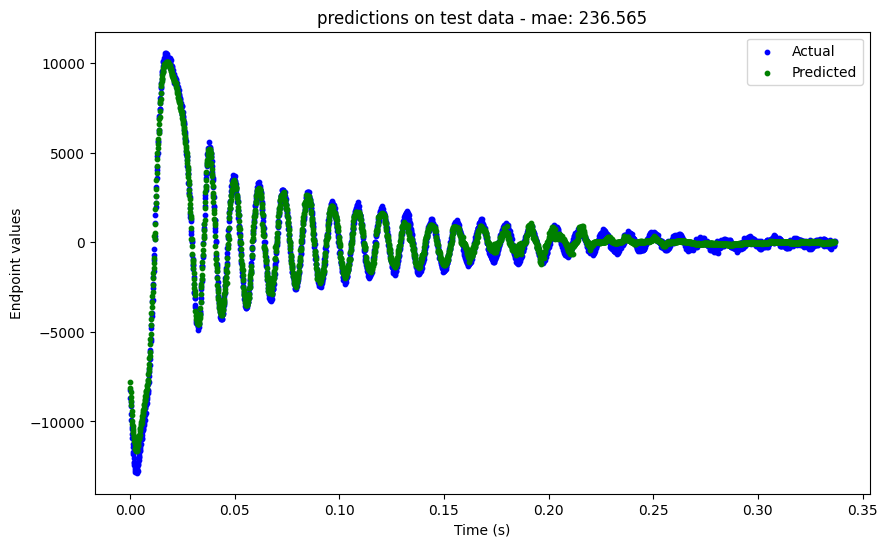

epoch 89
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0121 - mae: 0.0764 - val_loss: 0.0193 - val_mae: 0.0925
Epoch 2/4
5863/5863 [==============================] - 10s 2ms/step - loss: 0.0123 - mae: 0.0764 - val_loss: 0.0148 - val_mae: 0.0867
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0766 - val_loss: 0.0182 - val_mae: 0.0927
Epoch 4/4
85/85 [==============================] - 0s 945us/step


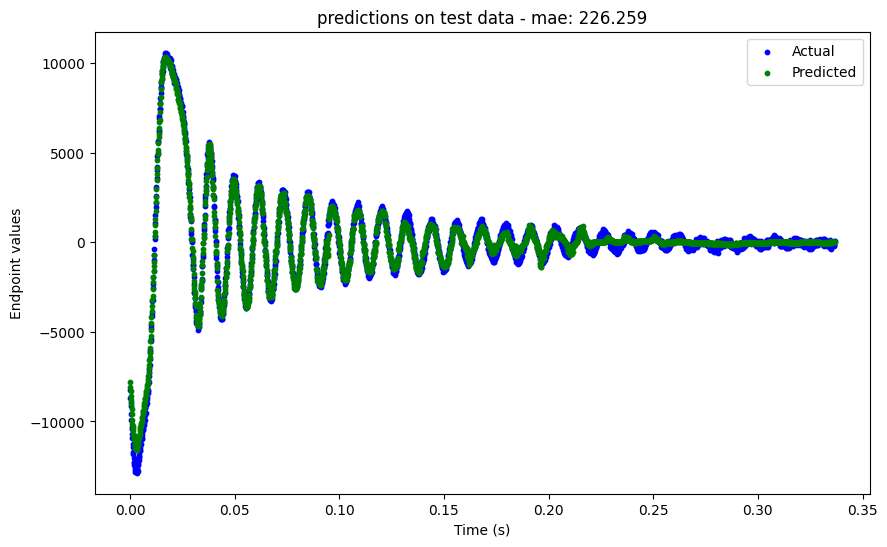

epoch 90
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0123 - mae: 0.0763 - val_loss: 0.0163 - val_mae: 0.0887
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0123 - mae: 0.0767 - val_loss: 0.0165 - val_mae: 0.0889
Epoch 3/4
5863/5863 [==============================] - 10s 2ms/step - loss: 0.0125 - mae: 0.0767 - val_loss: 0.0186 - val_mae: 0.0915
Epoch 4/4
85/85 [==============================] - 0s 880us/step


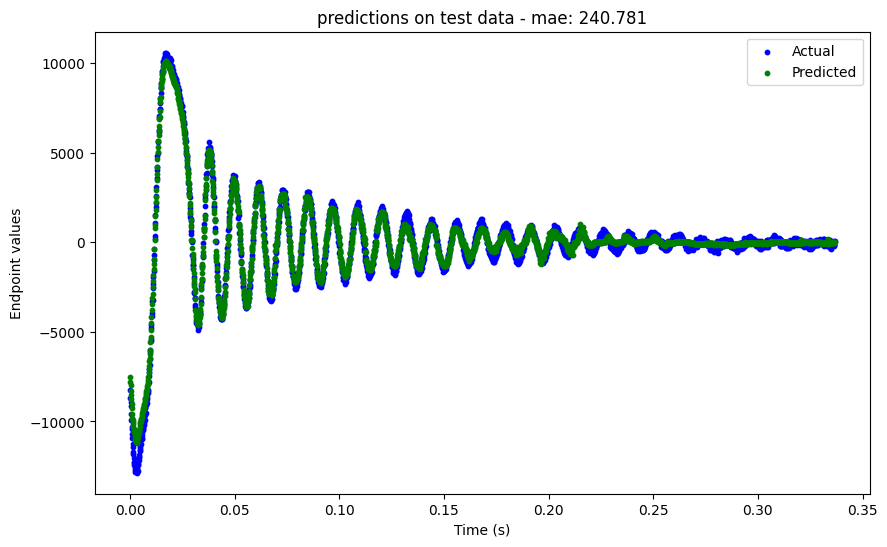

epoch 91
Epoch 1/4
5863/5863 [==============================] - 10s 2ms/step - loss: 0.0129 - mae: 0.0766 - val_loss: 0.0152 - val_mae: 0.0872
Epoch 2/4
5863/5863 [==============================] - 10s 2ms/step - loss: 0.0127 - mae: 0.0767 - val_loss: 0.0167 - val_mae: 0.0897
Epoch 3/4
5863/5863 [==============================] - 10s 2ms/step - loss: 0.0125 - mae: 0.0767 - val_loss: 0.0170 - val_mae: 0.0880
Epoch 4/4
85/85 [==============================] - 0s 899us/step


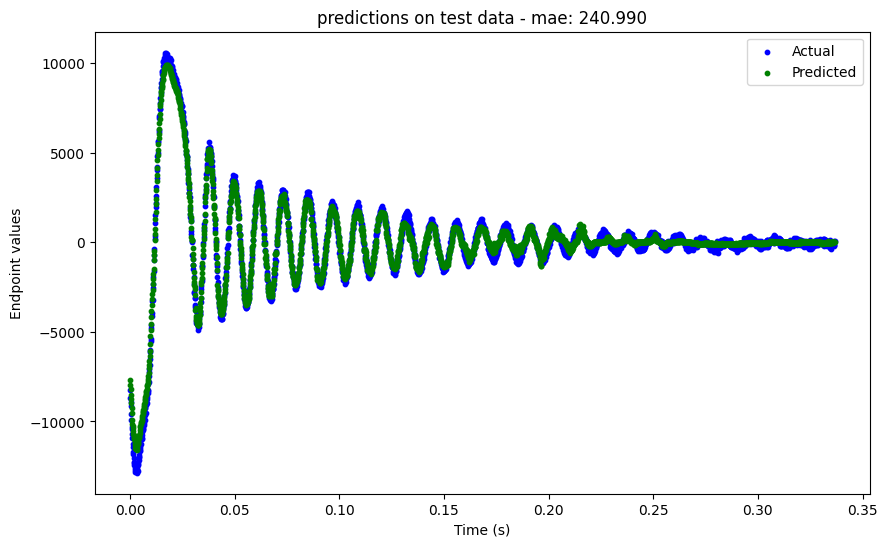

epoch 92
Epoch 1/4
5863/5863 [==============================] - 10s 2ms/step - loss: 0.0126 - mae: 0.0763 - val_loss: 0.0174 - val_mae: 0.0903
Epoch 2/4
5863/5863 [==============================] - 10s 2ms/step - loss: 0.0125 - mae: 0.0764 - val_loss: 0.0207 - val_mae: 0.0954
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0126 - mae: 0.0767 - val_loss: 0.0159 - val_mae: 0.0877
Epoch 4/4
85/85 [==============================] - 0s 910us/step


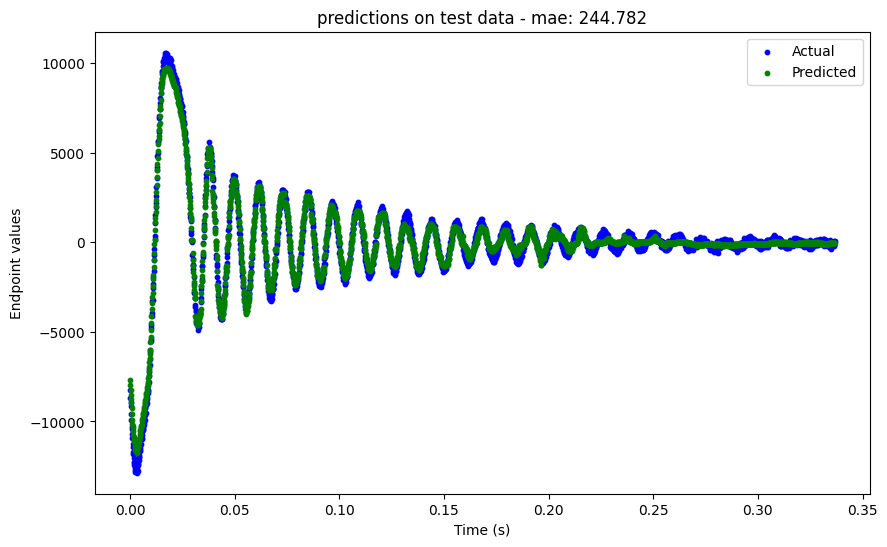

epoch 93
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0123 - mae: 0.0765 - val_loss: 0.0183 - val_mae: 0.0935
Epoch 2/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0122 - mae: 0.0764 - val_loss: 0.0162 - val_mae: 0.0885
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0126 - mae: 0.0763 - val_loss: 0.0145 - val_mae: 0.0851
Epoch 4/4
85/85 [==============================] - 0s 927us/step


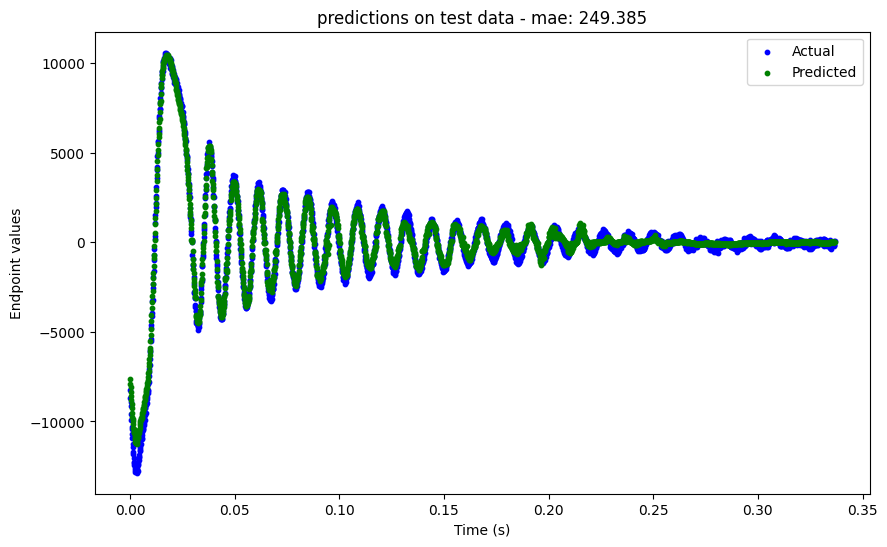

epoch 94
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0128 - mae: 0.0766 - val_loss: 0.0136 - val_mae: 0.0824
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0125 - mae: 0.0766 - val_loss: 0.0174 - val_mae: 0.0887
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0121 - mae: 0.0764 - val_loss: 0.0147 - val_mae: 0.0858
Epoch 4/4
85/85 [==============================] - 0s 928us/step


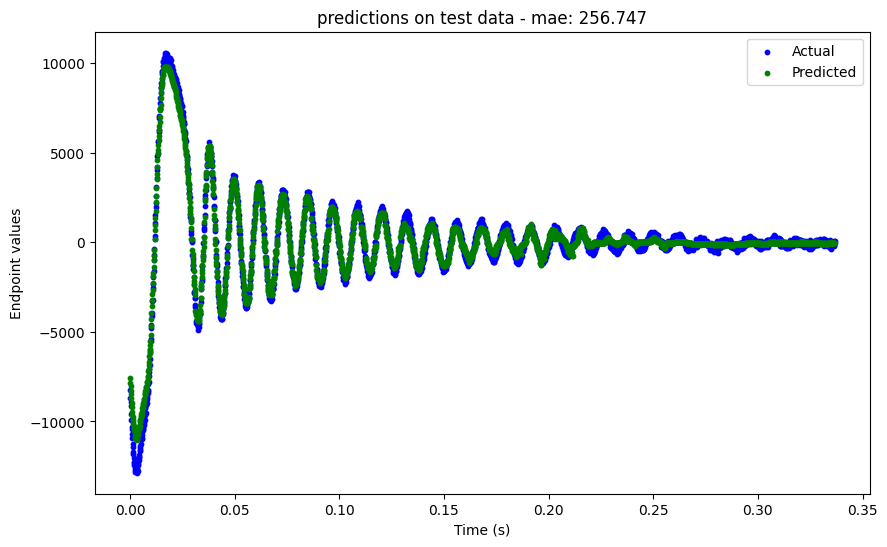

epoch 95
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0120 - mae: 0.0763 - val_loss: 0.0181 - val_mae: 0.0886
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0127 - mae: 0.0766 - val_loss: 0.0145 - val_mae: 0.0855
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0123 - mae: 0.0765 - val_loss: 0.0189 - val_mae: 0.0911
Epoch 4/4
85/85 [==============================] - 0s 916us/step


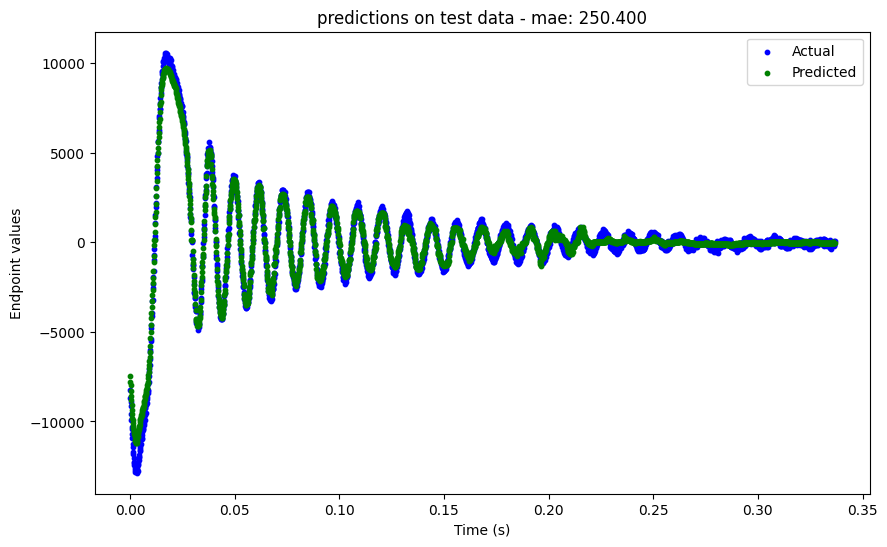

epoch 96
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0123 - mae: 0.0766 - val_loss: 0.0166 - val_mae: 0.0902
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0763 - val_loss: 0.0158 - val_mae: 0.0871
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0127 - mae: 0.0767 - val_loss: 0.0151 - val_mae: 0.0898
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


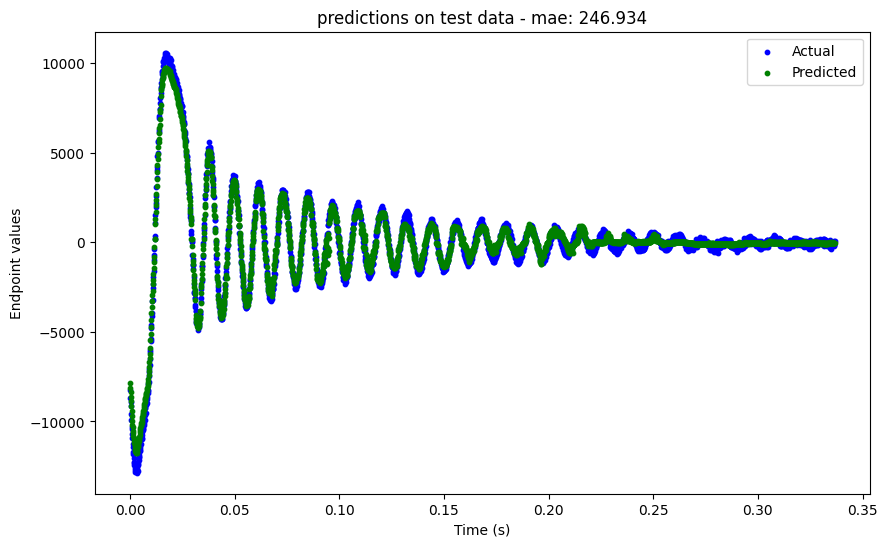

epoch 97
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0123 - mae: 0.0765 - val_loss: 0.0164 - val_mae: 0.0872
Epoch 2/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0122 - mae: 0.0763 - val_loss: 0.0140 - val_mae: 0.0850
Epoch 3/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0123 - mae: 0.0762 - val_loss: 0.0228 - val_mae: 0.0931
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


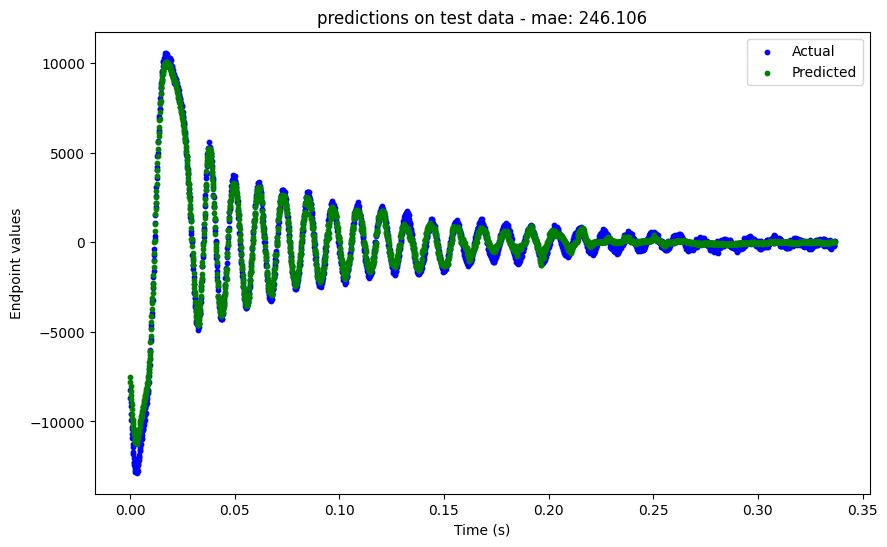

epoch 98
Epoch 1/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0129 - mae: 0.0768 - val_loss: 0.0165 - val_mae: 0.0882
Epoch 2/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0129 - mae: 0.0762 - val_loss: 0.0218 - val_mae: 0.0938
Epoch 3/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0125 - mae: 0.0766 - val_loss: 0.0130 - val_mae: 0.0826
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


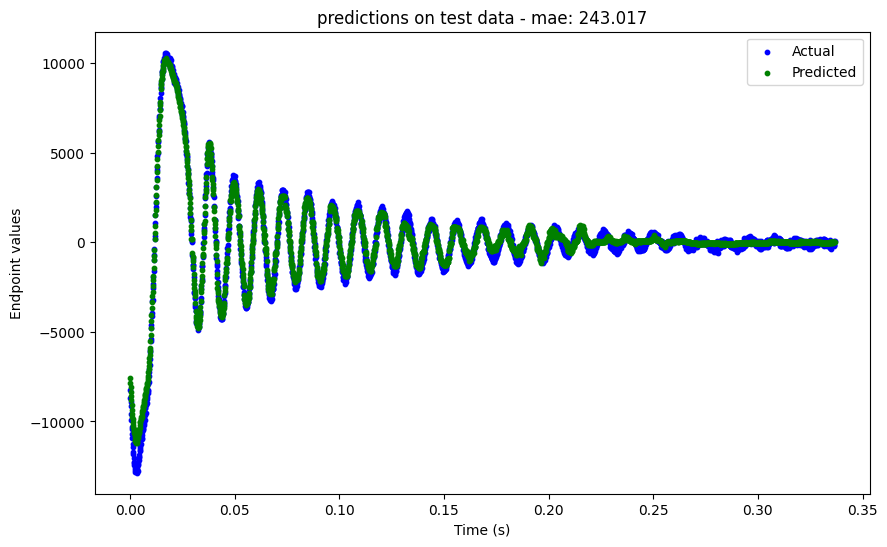

epoch 99
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0121 - mae: 0.0763 - val_loss: 0.0159 - val_mae: 0.0891
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0125 - mae: 0.0762 - val_loss: 0.0129 - val_mae: 0.0830
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0121 - mae: 0.0763 - val_loss: 0.0191 - val_mae: 0.0933
Epoch 4/4
85/85 [==============================] - 0s 922us/step


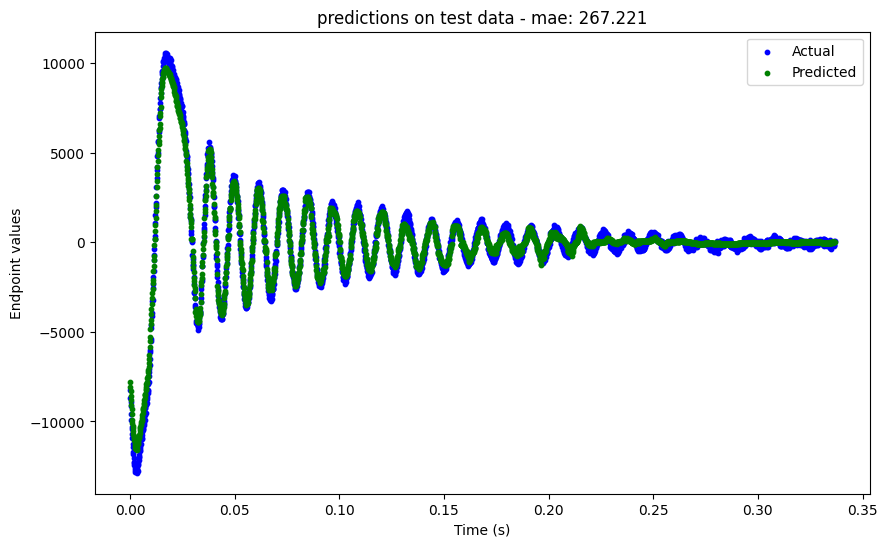

epoch 100
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0120 - mae: 0.0762 - val_loss: 0.0152 - val_mae: 0.0876
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0763 - val_loss: 0.0144 - val_mae: 0.0848
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0125 - mae: 0.0765 - val_loss: 0.0217 - val_mae: 0.0958
Epoch 4/4
85/85 [==============================] - 0s 938us/step


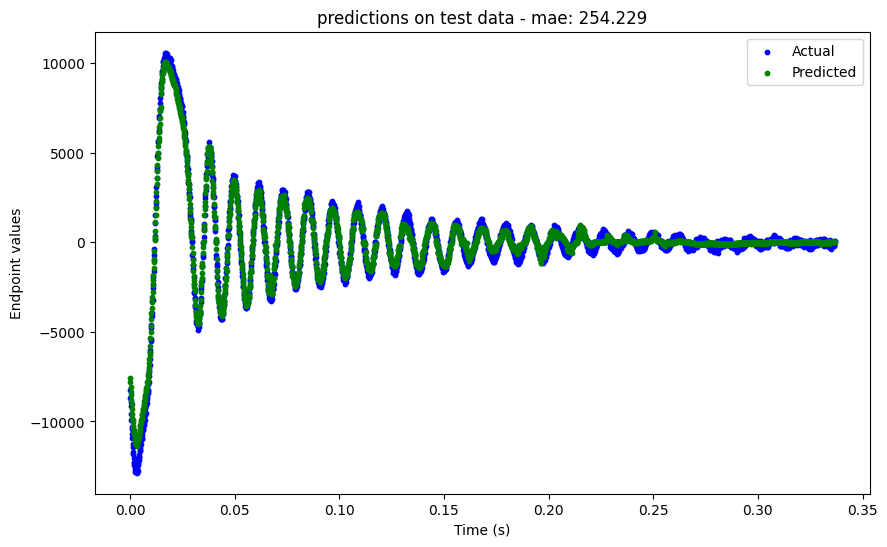

epoch 101
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0765 - val_loss: 0.0201 - val_mae: 0.0923
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0763 - val_loss: 0.0184 - val_mae: 0.0927
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0126 - mae: 0.0768 - val_loss: 0.0196 - val_mae: 0.0954
Epoch 4/4
85/85 [==============================] - 0s 922us/step


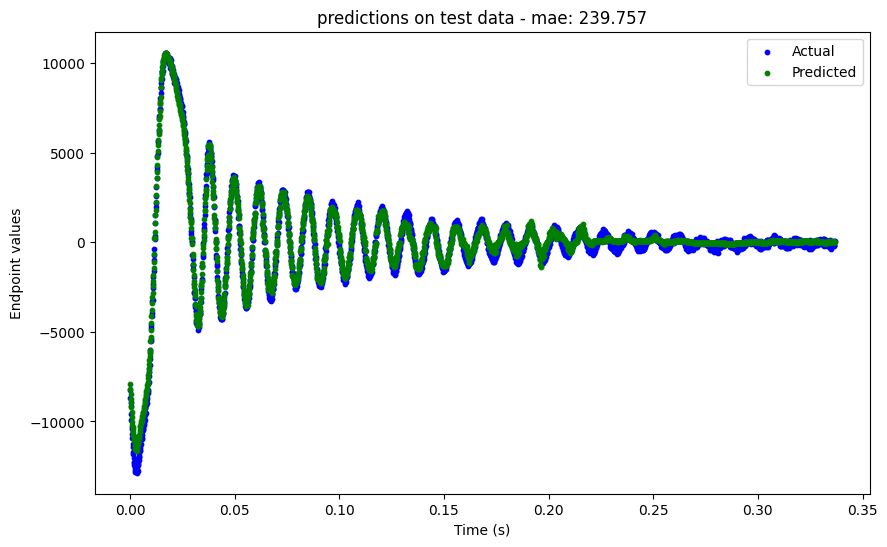

epoch 102
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0764 - val_loss: 0.0159 - val_mae: 0.0877
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0123 - mae: 0.0764 - val_loss: 0.0162 - val_mae: 0.0892
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0125 - mae: 0.0765 - val_loss: 0.0193 - val_mae: 0.0895
Epoch 4/4
85/85 [==============================] - 0s 930us/step


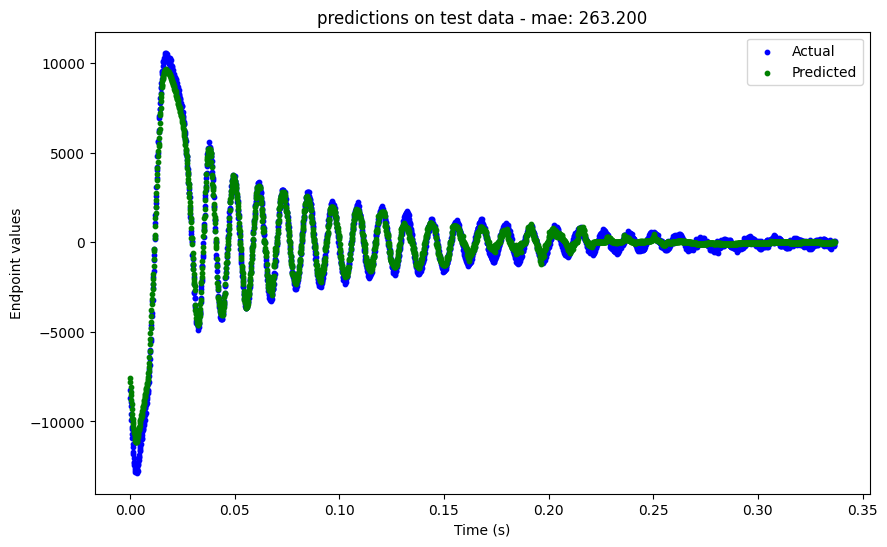

epoch 103
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0125 - mae: 0.0764 - val_loss: 0.0172 - val_mae: 0.0908
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0761 - val_loss: 0.0146 - val_mae: 0.0858
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0761 - val_loss: 0.0176 - val_mae: 0.0903
Epoch 4/4
85/85 [==============================] - 0s 943us/step


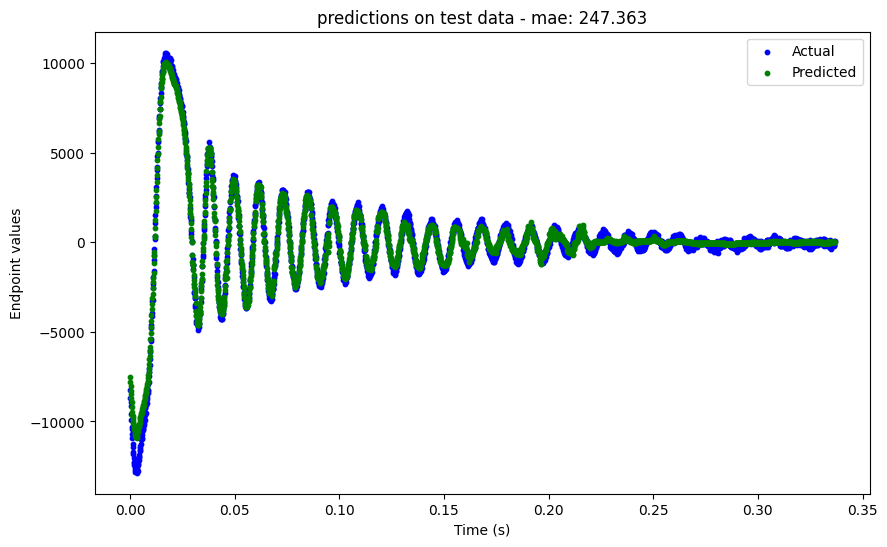

epoch 104
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0763 - val_loss: 0.0155 - val_mae: 0.0898
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0764 - val_loss: 0.0177 - val_mae: 0.0913
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0120 - mae: 0.0761 - val_loss: 0.0171 - val_mae: 0.0857
Epoch 4/4
85/85 [==============================] - 0s 910us/step


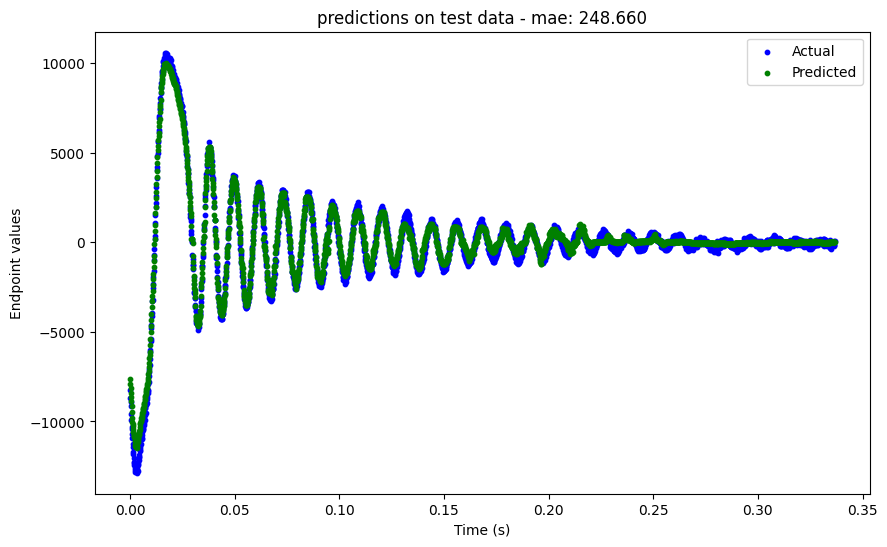

epoch 105
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0119 - mae: 0.0761 - val_loss: 0.0156 - val_mae: 0.0873
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0763 - val_loss: 0.0171 - val_mae: 0.0905
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0126 - mae: 0.0763 - val_loss: 0.0175 - val_mae: 0.0875
Epoch 4/4
85/85 [==============================] - 0s 929us/step


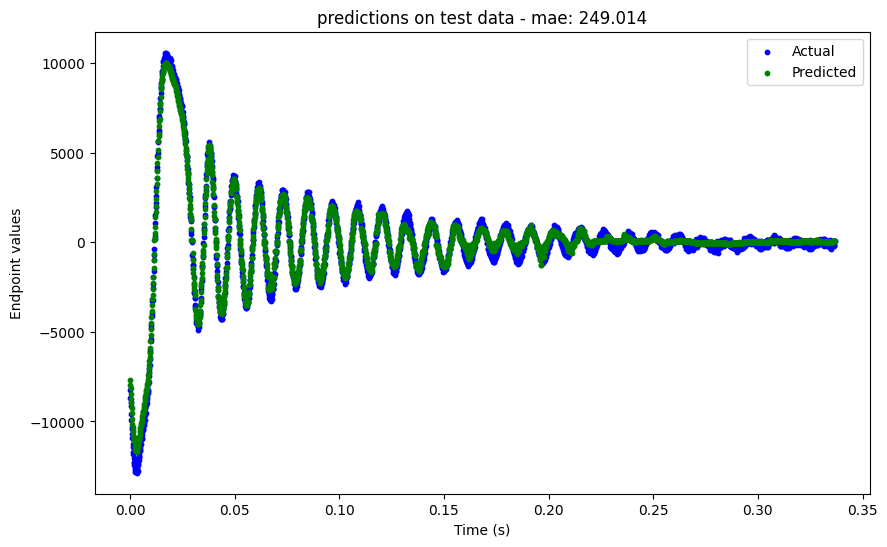

epoch 106
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0762 - val_loss: 0.0171 - val_mae: 0.0897
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0121 - mae: 0.0762 - val_loss: 0.0147 - val_mae: 0.0866
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0758 - val_loss: 0.0168 - val_mae: 0.0893
Epoch 4/4
85/85 [==============================] - 0s 920us/step


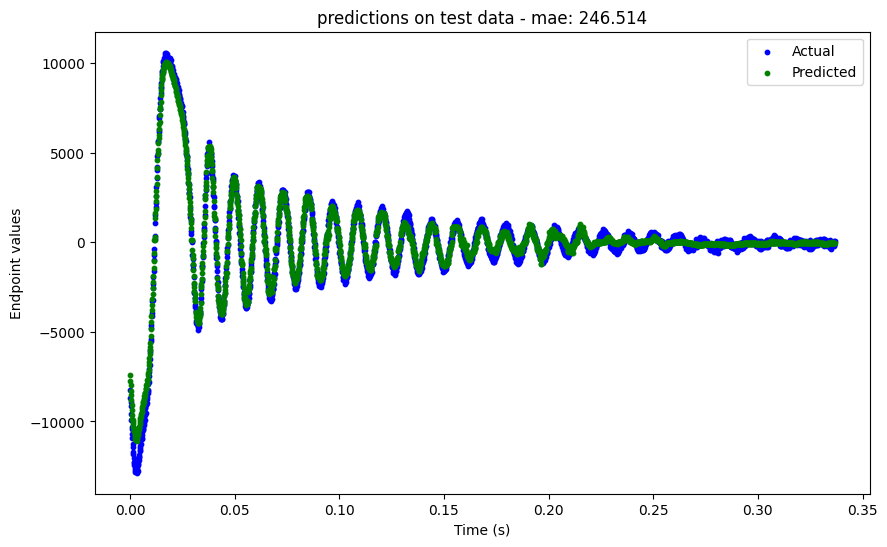

epoch 107
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0121 - mae: 0.0764 - val_loss: 0.0194 - val_mae: 0.0933
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0120 - mae: 0.0763 - val_loss: 0.0152 - val_mae: 0.0862
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0123 - mae: 0.0766 - val_loss: 0.0174 - val_mae: 0.0896
Epoch 4/4
85/85 [==============================] - 0s 947us/step


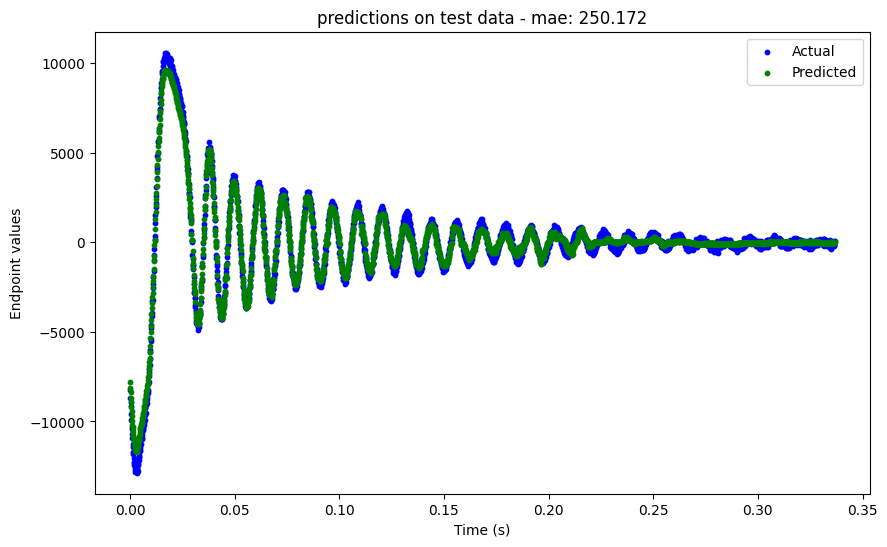

epoch 108
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0127 - mae: 0.0762 - val_loss: 0.0177 - val_mae: 0.0911
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0759 - val_loss: 0.0153 - val_mae: 0.0861
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0120 - mae: 0.0759 - val_loss: 0.0166 - val_mae: 0.0892
Epoch 4/4
85/85 [==============================] - 0s 901us/step


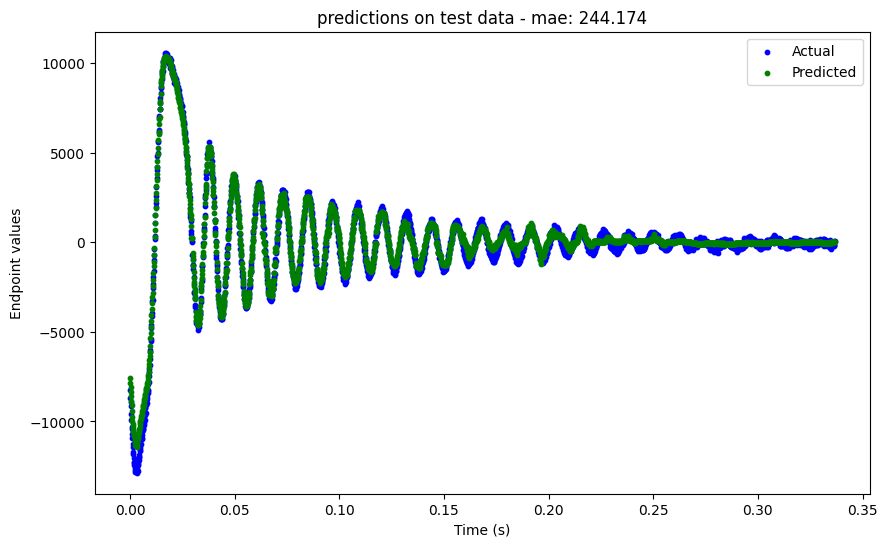

epoch 109
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0762 - val_loss: 0.0193 - val_mae: 0.0924
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0762 - val_loss: 0.0165 - val_mae: 0.0898
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0120 - mae: 0.0760 - val_loss: 0.0217 - val_mae: 0.0988
Epoch 4/4
85/85 [==============================] - 0s 919us/step


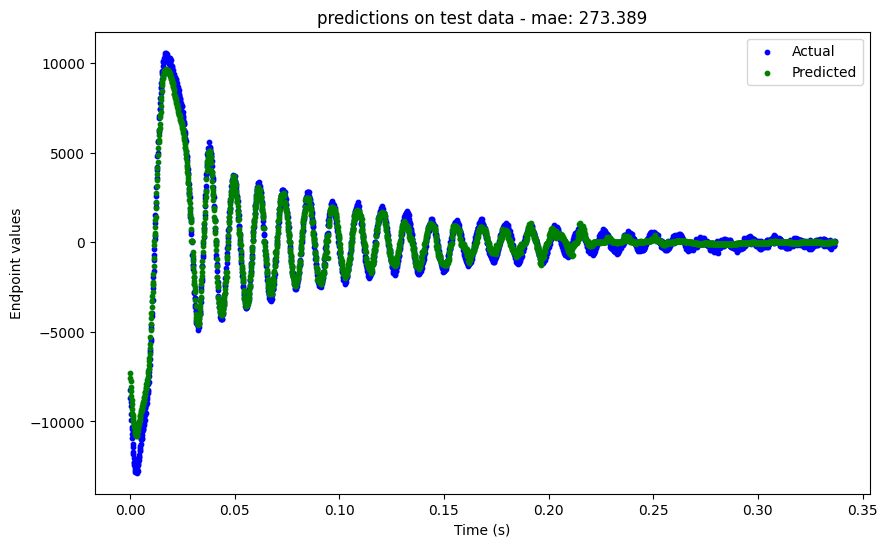

epoch 110
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0761 - val_loss: 0.0160 - val_mae: 0.0888
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0125 - mae: 0.0763 - val_loss: 0.0152 - val_mae: 0.0859
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0761 - val_loss: 0.0225 - val_mae: 0.0967
Epoch 4/4
85/85 [==============================] - 0s 917us/step


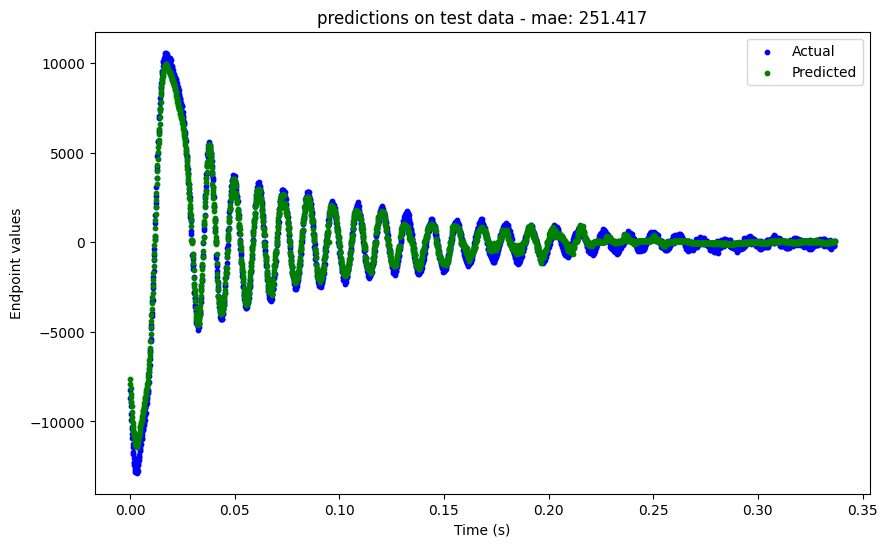

epoch 111
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0125 - mae: 0.0761 - val_loss: 0.0142 - val_mae: 0.0843
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0120 - mae: 0.0761 - val_loss: 0.0152 - val_mae: 0.0856
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0126 - mae: 0.0764 - val_loss: 0.0150 - val_mae: 0.0873
Epoch 4/4
85/85 [==============================] - 0s 936us/step


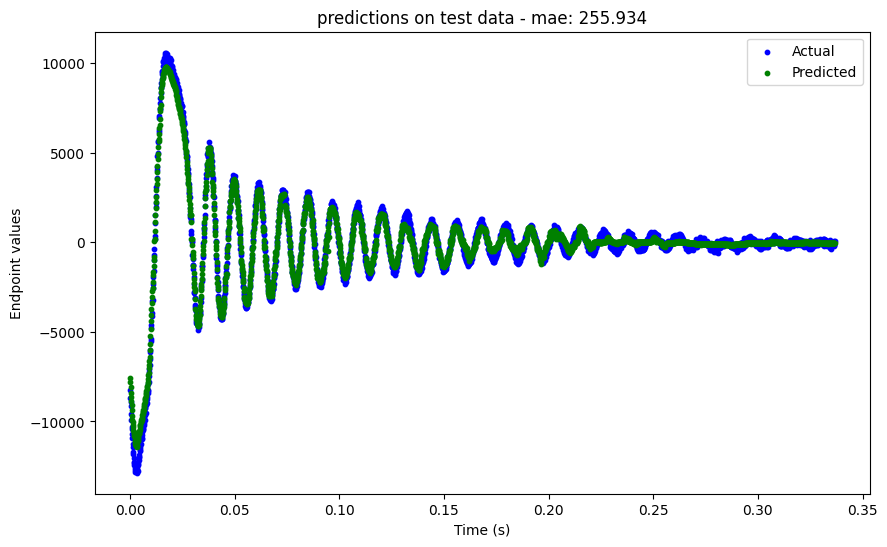

epoch 112
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0762 - val_loss: 0.0154 - val_mae: 0.0859
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0760 - val_loss: 0.0198 - val_mae: 0.0943
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0123 - mae: 0.0760 - val_loss: 0.0172 - val_mae: 0.0895
Epoch 4/4
85/85 [==============================] - 0s 900us/step


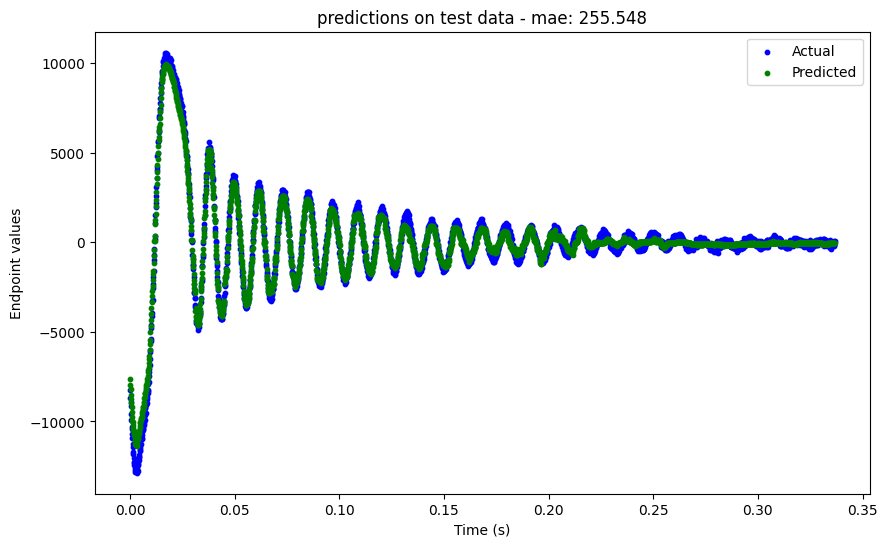

epoch 113
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0121 - mae: 0.0762 - val_loss: 0.0142 - val_mae: 0.0838
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0761 - val_loss: 0.0151 - val_mae: 0.0866
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0760 - val_loss: 0.0167 - val_mae: 0.0884
Epoch 4/4
85/85 [==============================] - 0s 918us/step


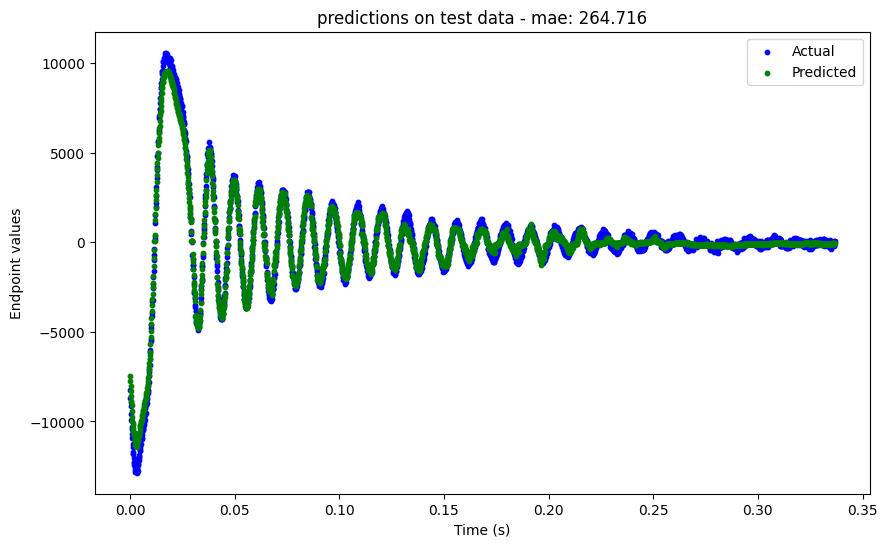

epoch 114
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0130 - mae: 0.0762 - val_loss: 0.0154 - val_mae: 0.0859
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0759 - val_loss: 0.0181 - val_mae: 0.0918
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0760 - val_loss: 0.0201 - val_mae: 0.0917
Epoch 4/4
85/85 [==============================] - 0s 921us/step


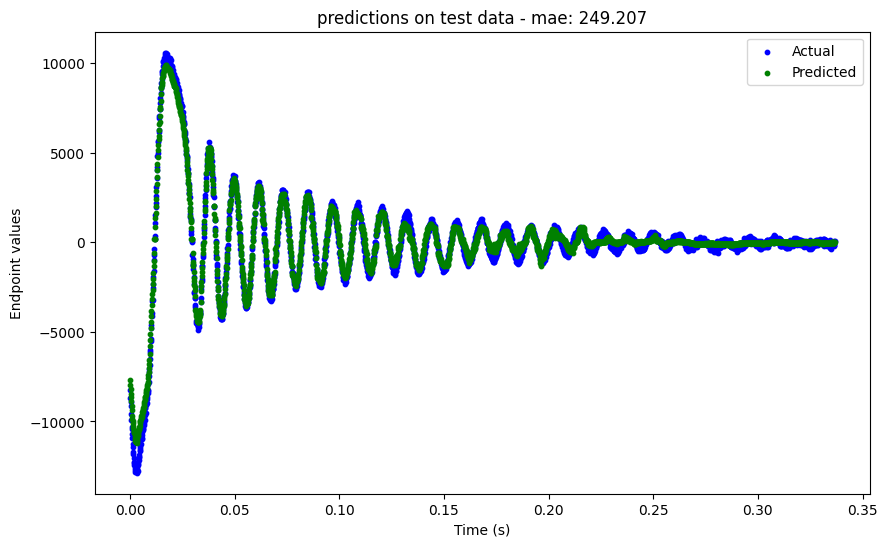

epoch 115
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0139 - mae: 0.0777 - val_loss: 0.0156 - val_mae: 0.0870
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0125 - mae: 0.0763 - val_loss: 0.0172 - val_mae: 0.0898
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0126 - mae: 0.0760 - val_loss: 0.0154 - val_mae: 0.0881
Epoch 4/4
85/85 [==============================] - 0s 927us/step


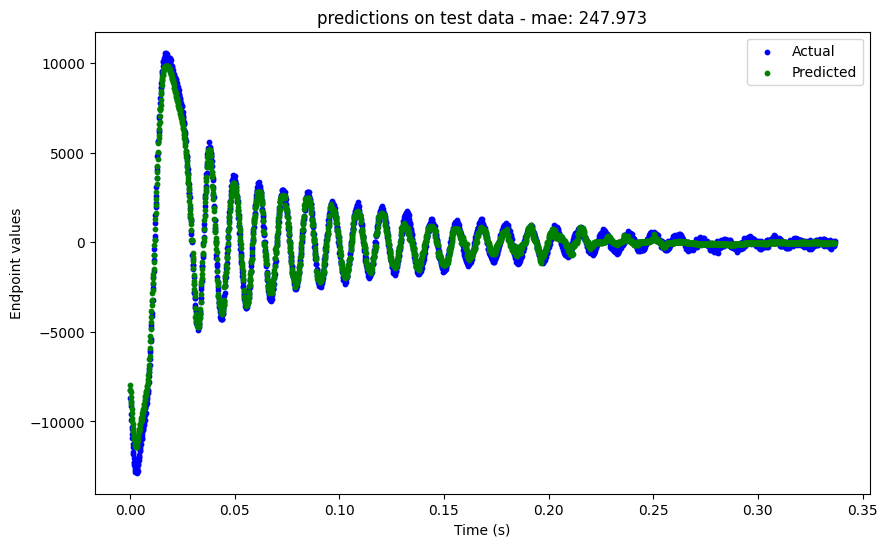

epoch 116
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0120 - mae: 0.0757 - val_loss: 0.0175 - val_mae: 0.0937
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0118 - mae: 0.0757 - val_loss: 0.0160 - val_mae: 0.0878
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0121 - mae: 0.0760 - val_loss: 0.0172 - val_mae: 0.0914
Epoch 4/4
85/85 [==============================] - 0s 938us/step


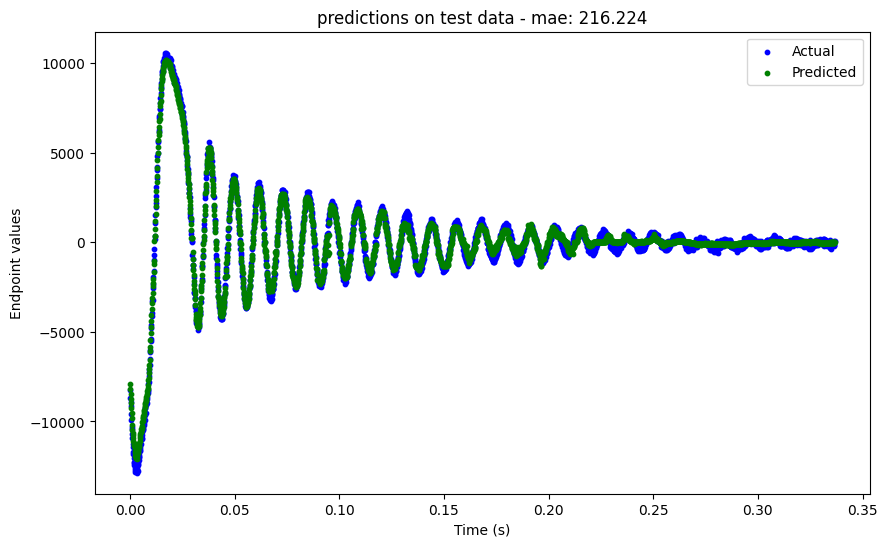

epoch 117
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0120 - mae: 0.0756 - val_loss: 0.0174 - val_mae: 0.0910
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0120 - mae: 0.0758 - val_loss: 0.0183 - val_mae: 0.0946
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0119 - mae: 0.0756 - val_loss: 0.0202 - val_mae: 0.0925
Epoch 4/4
85/85 [==============================] - 0s 877us/step


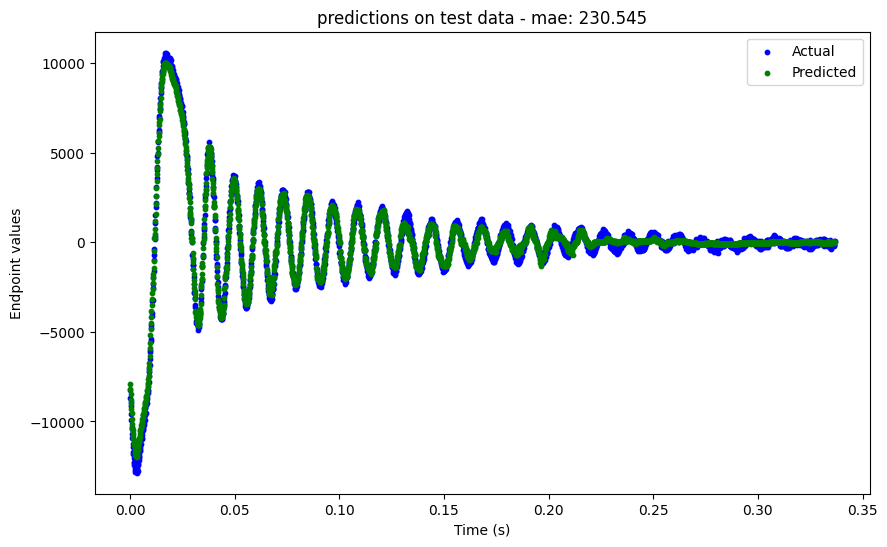

epoch 118
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0120 - mae: 0.0756 - val_loss: 0.0169 - val_mae: 0.0900
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0127 - mae: 0.0764 - val_loss: 0.0172 - val_mae: 0.0898
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0119 - mae: 0.0759 - val_loss: 0.0167 - val_mae: 0.0893
Epoch 4/4
85/85 [==============================] - 0s 908us/step


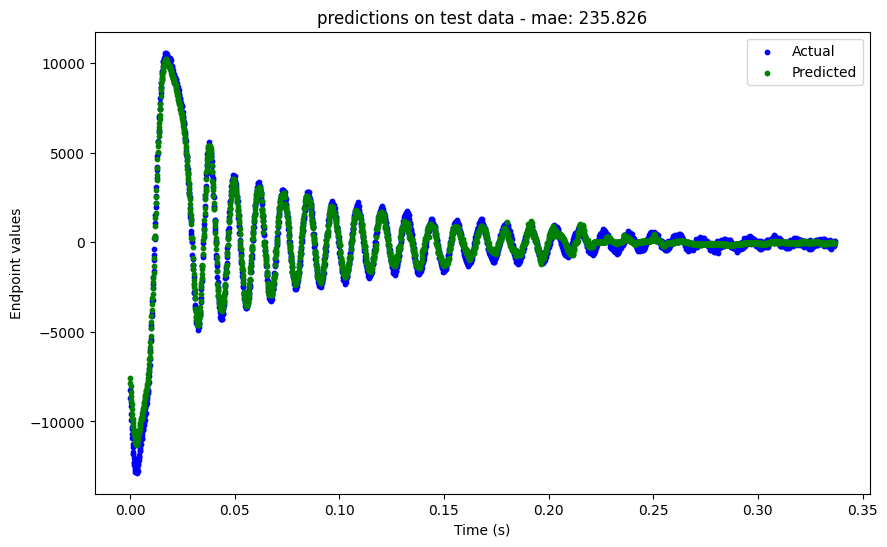

epoch 119
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0121 - mae: 0.0761 - val_loss: 0.0149 - val_mae: 0.0863
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0121 - mae: 0.0761 - val_loss: 0.0159 - val_mae: 0.0874
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0760 - val_loss: 0.0180 - val_mae: 0.0930
Epoch 4/4
85/85 [==============================] - 0s 963us/step


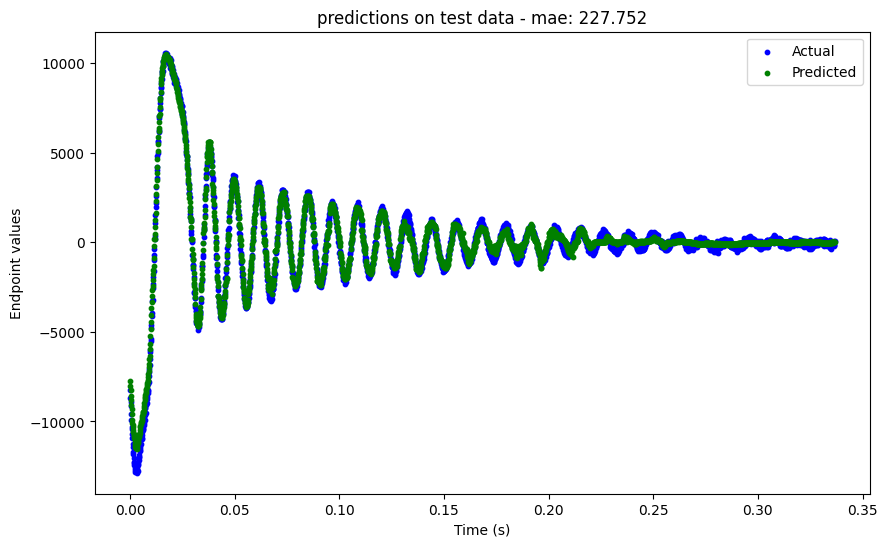

epoch 120
Epoch 1/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0121 - mae: 0.0757 - val_loss: 0.0178 - val_mae: 0.0915
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0120 - mae: 0.0758 - val_loss: 0.0136 - val_mae: 0.0845
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0759 - val_loss: 0.0172 - val_mae: 0.0900
Epoch 4/4
85/85 [==============================] - 0s 982us/step


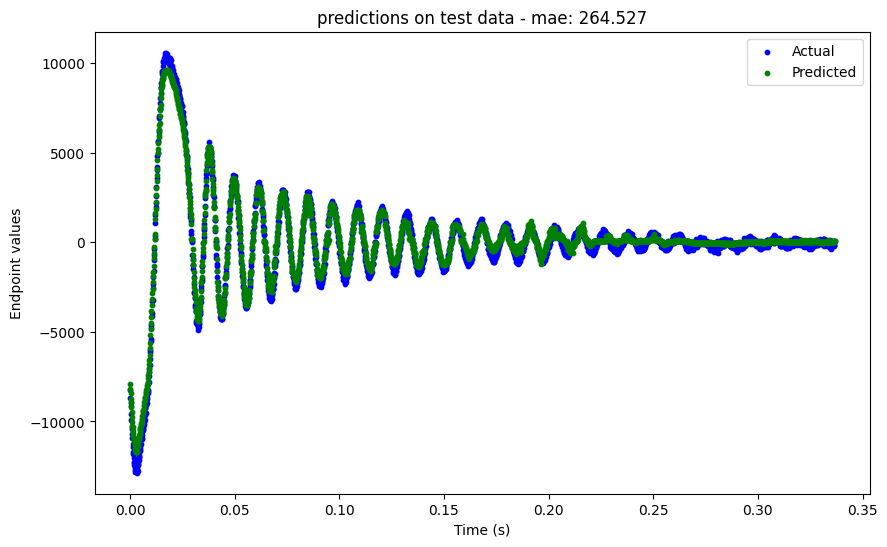

epoch 121
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0123 - mae: 0.0760 - val_loss: 0.0132 - val_mae: 0.0829
Epoch 2/4
5863/5863 [==============================] - 10s 2ms/step - loss: 0.0123 - mae: 0.0759 - val_loss: 0.0151 - val_mae: 0.0871
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0121 - mae: 0.0758 - val_loss: 0.0166 - val_mae: 0.0895
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


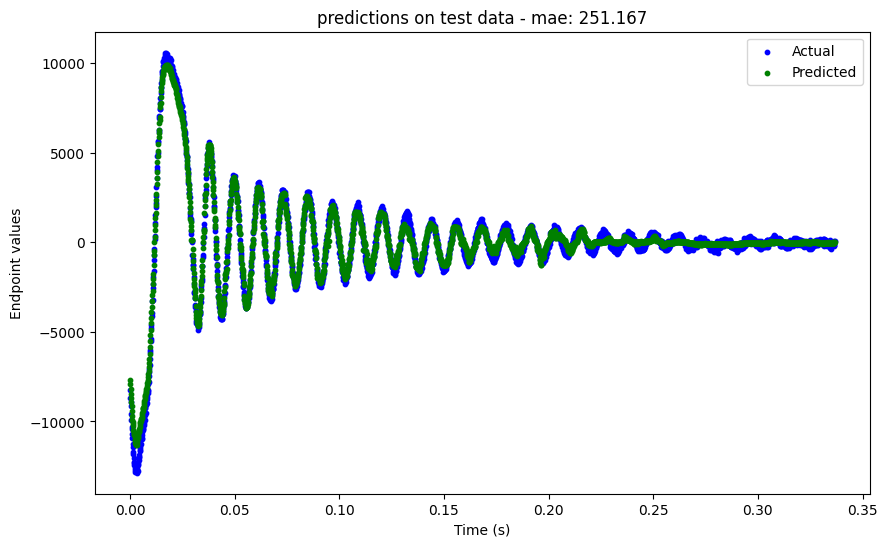

epoch 122
Epoch 1/4
5863/5863 [==============================] - 14s 2ms/step - loss: 0.0123 - mae: 0.0761 - val_loss: 0.0166 - val_mae: 0.0898
Epoch 2/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0118 - mae: 0.0756 - val_loss: 0.0154 - val_mae: 0.0872
Epoch 3/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0120 - mae: 0.0759 - val_loss: 0.0141 - val_mae: 0.0856
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


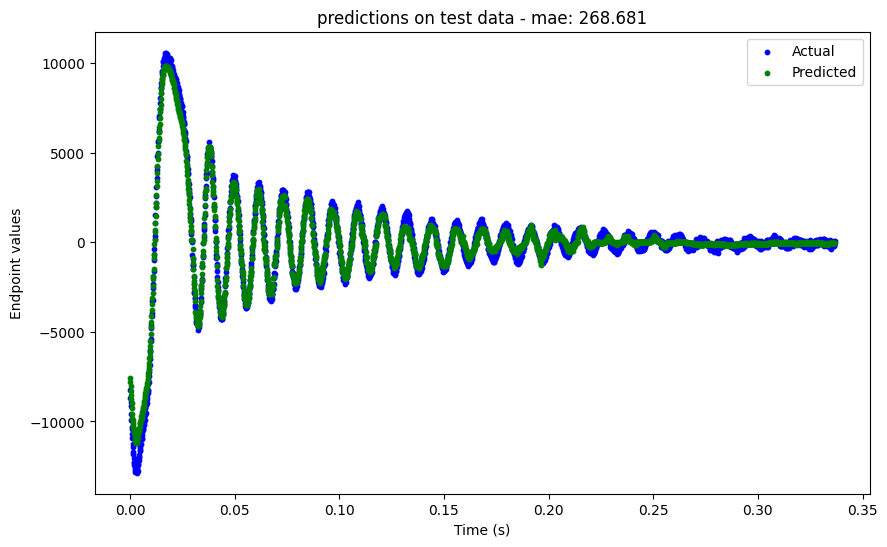

epoch 123
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0119 - mae: 0.0759 - val_loss: 0.0182 - val_mae: 0.0913
Epoch 2/4
5863/5863 [==============================] - 14s 2ms/step - loss: 0.0120 - mae: 0.0758 - val_loss: 0.0152 - val_mae: 0.0873
Epoch 3/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0118 - mae: 0.0757 - val_loss: 0.0191 - val_mae: 0.0949
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


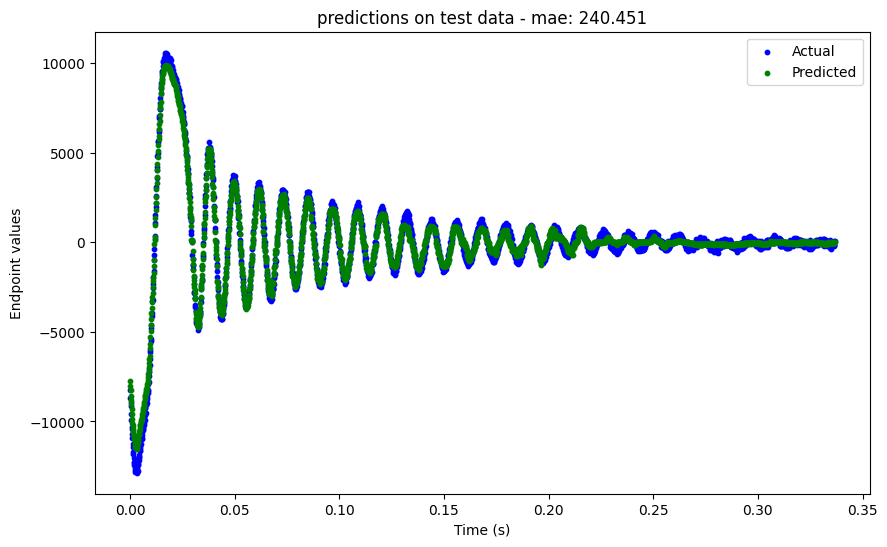

epoch 124
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0122 - mae: 0.0761 - val_loss: 0.0150 - val_mae: 0.0859
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0123 - mae: 0.0764 - val_loss: 0.0170 - val_mae: 0.0903
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0124 - mae: 0.0759 - val_loss: 0.0224 - val_mae: 0.0956
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


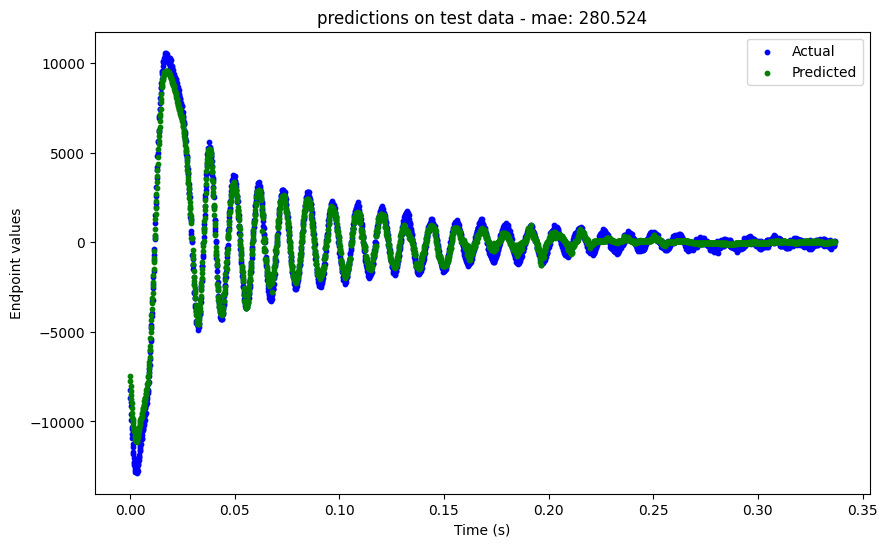

epoch 125
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0120 - mae: 0.0755 - val_loss: 0.0168 - val_mae: 0.0871
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0125 - mae: 0.0762 - val_loss: 0.0152 - val_mae: 0.0871
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0123 - mae: 0.0760 - val_loss: 0.0142 - val_mae: 0.0848
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


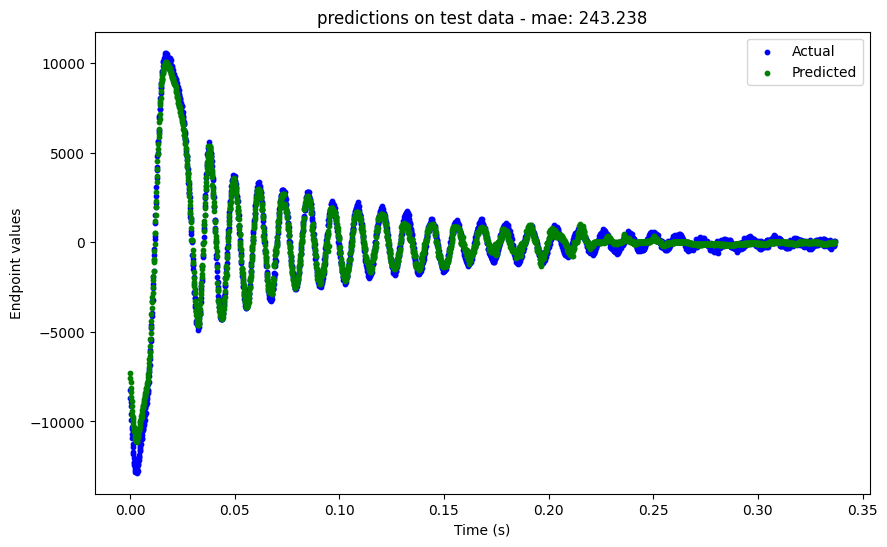

epoch 126
Epoch 1/4
5863/5863 [==============================] - 15s 3ms/step - loss: 0.0124 - mae: 0.0758 - val_loss: 0.0175 - val_mae: 0.0894
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0116 - mae: 0.0753 - val_loss: 0.0144 - val_mae: 0.0844
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0118 - mae: 0.0756 - val_loss: 0.0169 - val_mae: 0.0903
Epoch 4/4
85/85 [==============================] - 0s 982us/step


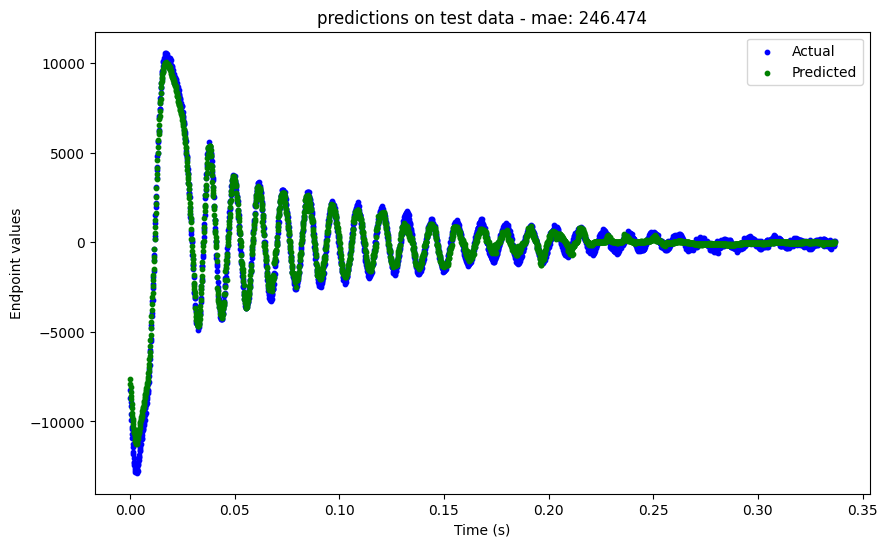

epoch 127
Epoch 1/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0122 - mae: 0.0759 - val_loss: 0.0157 - val_mae: 0.0861
Epoch 2/4
5863/5863 [==============================] - 14s 2ms/step - loss: 0.0120 - mae: 0.0759 - val_loss: 0.0191 - val_mae: 0.0933
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0119 - mae: 0.0756 - val_loss: 0.0171 - val_mae: 0.0899
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


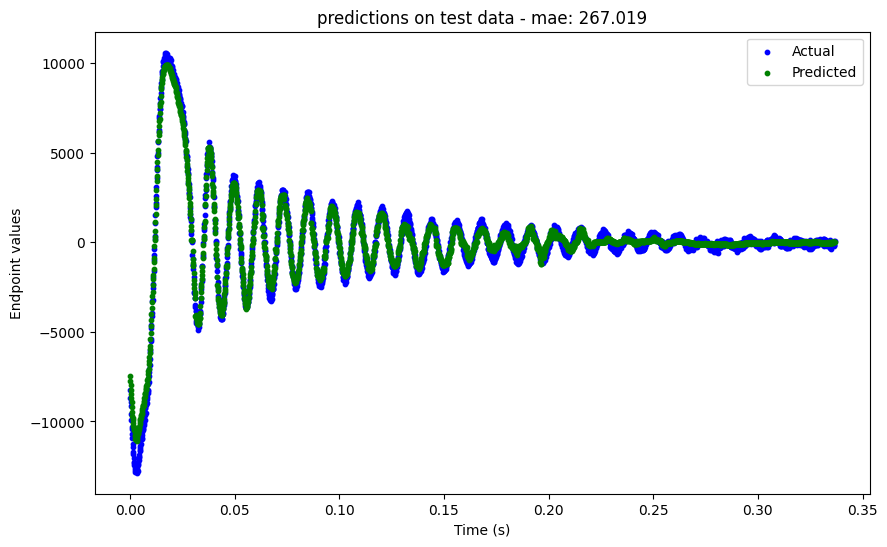

epoch 128
Epoch 1/4
5863/5863 [==============================] - 15s 3ms/step - loss: 0.0119 - mae: 0.0754 - val_loss: 0.0141 - val_mae: 0.0844
Epoch 2/4
5863/5863 [==============================] - 14s 2ms/step - loss: 0.0118 - mae: 0.0754 - val_loss: 0.0193 - val_mae: 0.0970
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0119 - mae: 0.0755 - val_loss: 0.0156 - val_mae: 0.0872
Epoch 4/4
85/85 [==============================] - 0s 983us/step


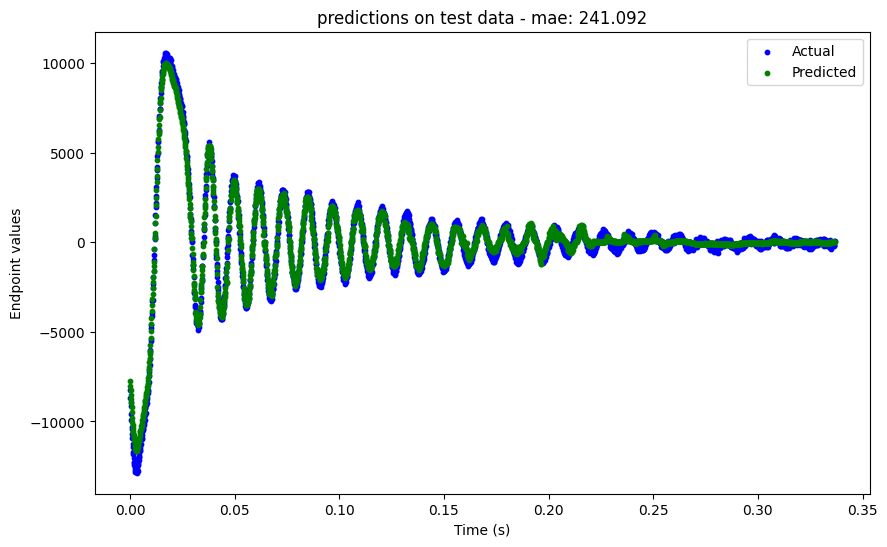

epoch 129
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0118 - mae: 0.0756 - val_loss: 0.0213 - val_mae: 0.0965
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0124 - mae: 0.0758 - val_loss: 0.0140 - val_mae: 0.0848
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0122 - mae: 0.0759 - val_loss: 0.0168 - val_mae: 0.0905
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


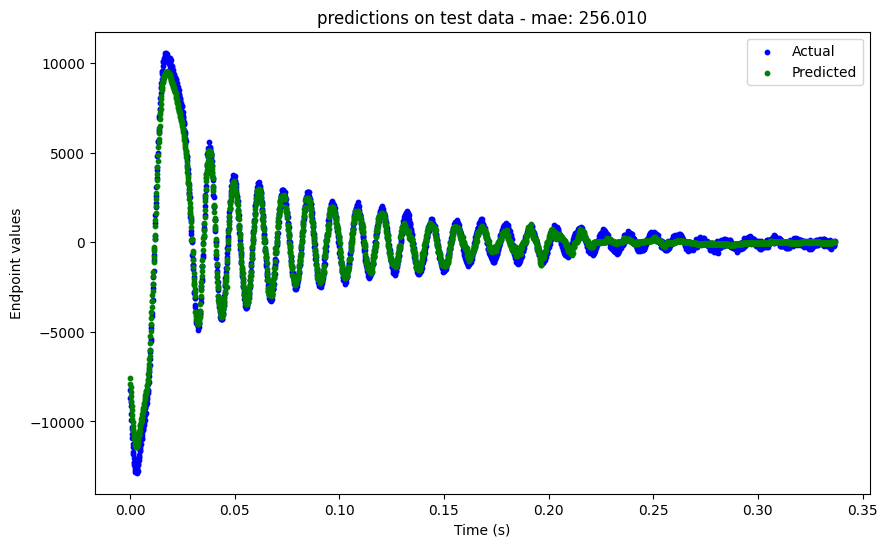

epoch 130
Epoch 1/4
5863/5863 [==============================] - 15s 3ms/step - loss: 0.0120 - mae: 0.0754 - val_loss: 0.0168 - val_mae: 0.0935
Epoch 2/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0149 - mae: 0.0761 - val_loss: 0.0161 - val_mae: 0.0880
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0122 - mae: 0.0758 - val_loss: 0.0132 - val_mae: 0.0833
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


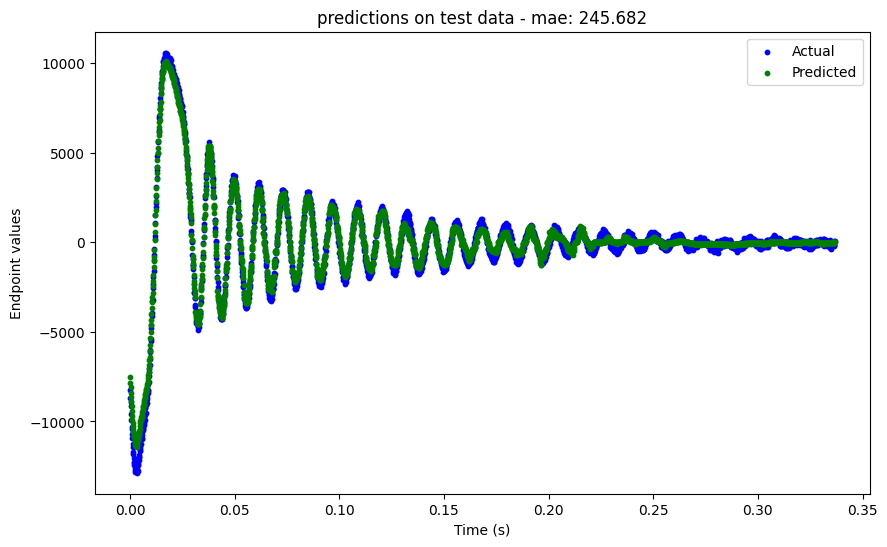

epoch 131
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0124 - mae: 0.0760 - val_loss: 0.0140 - val_mae: 0.0834
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0126 - mae: 0.0762 - val_loss: 0.0167 - val_mae: 0.0899
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0132 - mae: 0.0759 - val_loss: 0.0144 - val_mae: 0.0859
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


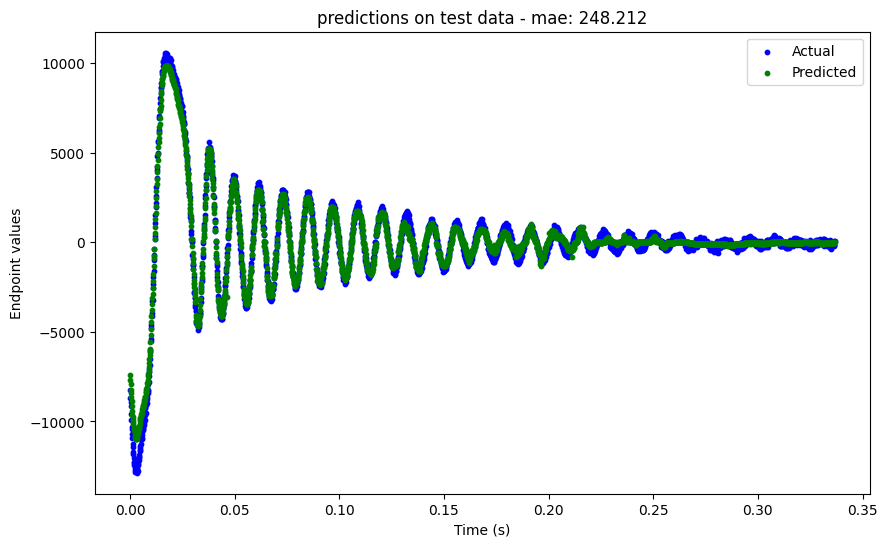

epoch 132
Epoch 1/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0117 - mae: 0.0755 - val_loss: 0.0177 - val_mae: 0.0907
Epoch 2/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0123 - mae: 0.0756 - val_loss: 0.0157 - val_mae: 0.0893
Epoch 3/4
5863/5863 [==============================] - 11s 2ms/step - loss: 0.0126 - mae: 0.0758 - val_loss: 0.0147 - val_mae: 0.0847
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


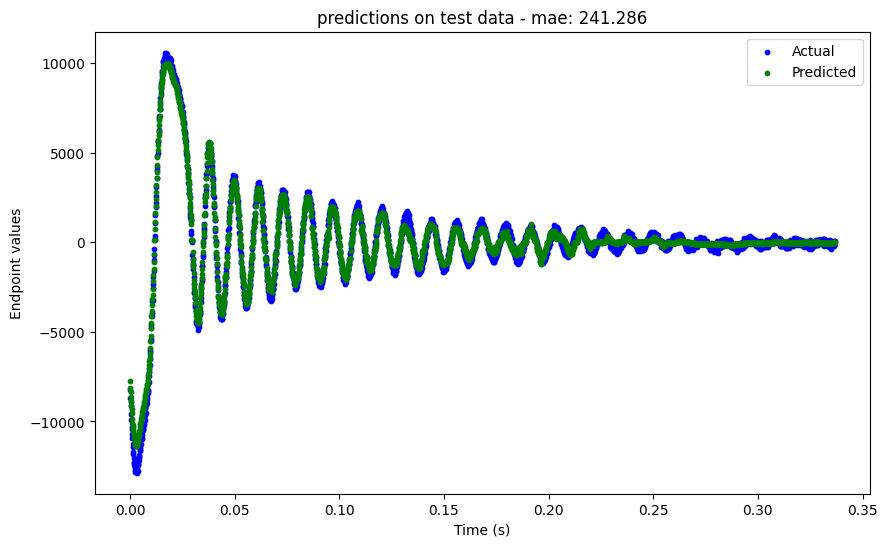

epoch 133
Epoch 1/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0124 - mae: 0.0755 - val_loss: 0.0168 - val_mae: 0.0897
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0122 - mae: 0.0754 - val_loss: 0.0178 - val_mae: 0.0915
Epoch 3/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0121 - mae: 0.0756 - val_loss: 0.0251 - val_mae: 0.1020
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


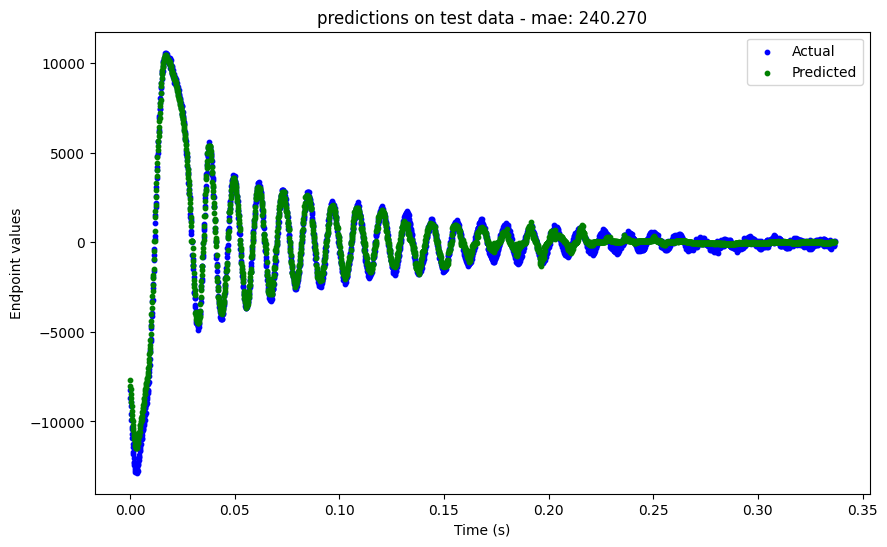

epoch 134
Epoch 1/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0121 - mae: 0.0756 - val_loss: 0.0158 - val_mae: 0.0903
Epoch 2/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0122 - mae: 0.0758 - val_loss: 0.0149 - val_mae: 0.0863
Epoch 3/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0125 - mae: 0.0760 - val_loss: 0.0174 - val_mae: 0.0895
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


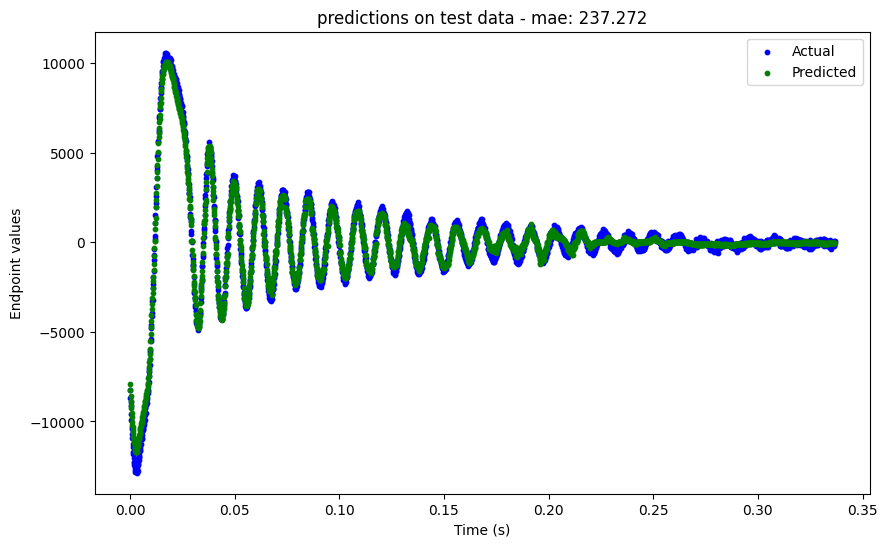

epoch 135
Epoch 1/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0123 - mae: 0.0756 - val_loss: 0.0167 - val_mae: 0.0895
Epoch 2/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0119 - mae: 0.0754 - val_loss: 0.0190 - val_mae: 0.0945
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0119 - mae: 0.0758 - val_loss: 0.0206 - val_mae: 0.0956
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


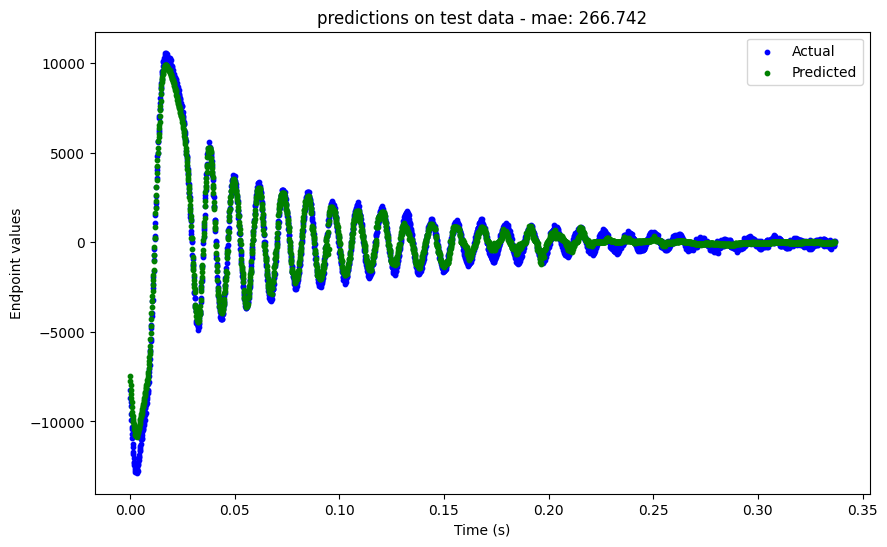

epoch 136
Epoch 1/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0125 - mae: 0.0757 - val_loss: 0.0186 - val_mae: 0.0918
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0119 - mae: 0.0756 - val_loss: 0.0195 - val_mae: 0.0935
Epoch 3/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0128 - mae: 0.0758 - val_loss: 0.0168 - val_mae: 0.0885
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


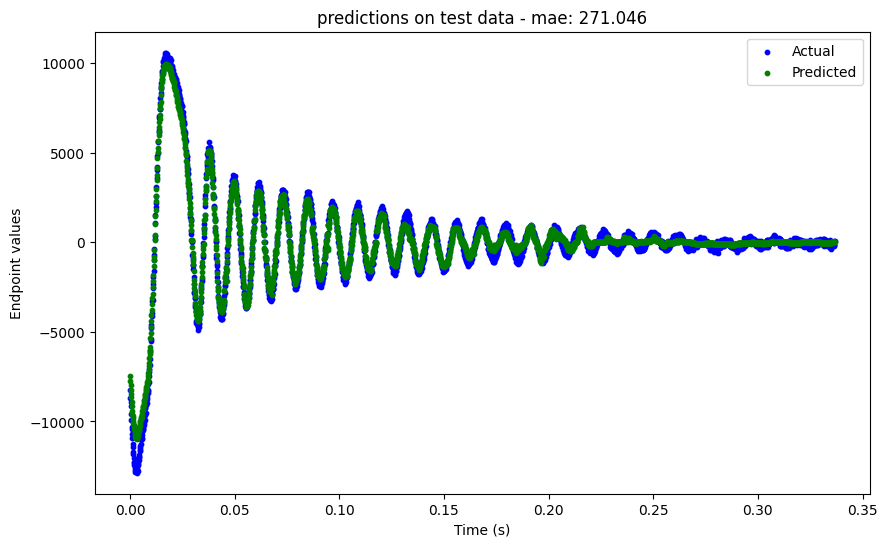

epoch 137
Epoch 1/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0123 - mae: 0.0757 - val_loss: 0.0129 - val_mae: 0.0821
Epoch 2/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0118 - mae: 0.0754 - val_loss: 0.0186 - val_mae: 0.0920
Epoch 3/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0123 - mae: 0.0756 - val_loss: 0.0220 - val_mae: 0.0989
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


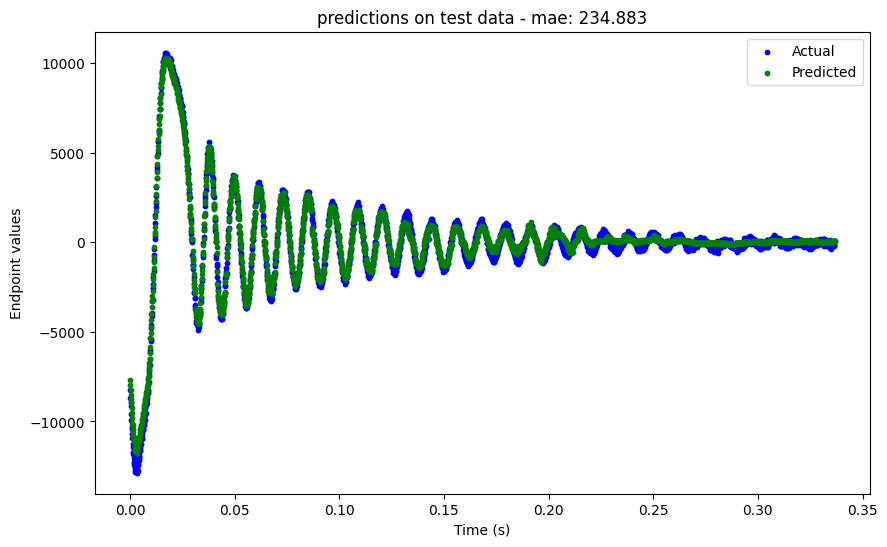

epoch 138
Epoch 1/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0120 - mae: 0.0756 - val_loss: 0.0165 - val_mae: 0.0867
Epoch 2/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0122 - mae: 0.0753 - val_loss: 0.0150 - val_mae: 0.0842
Epoch 3/4
5863/5863 [==============================] - 13s 2ms/step - loss: 0.0121 - mae: 0.0759 - val_loss: 0.0156 - val_mae: 0.0864
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


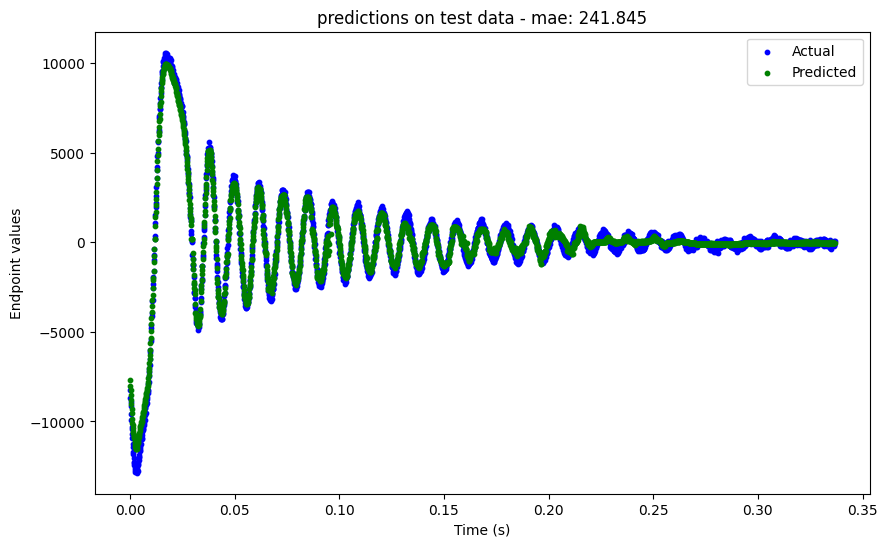

epoch 139
Epoch 1/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0119 - mae: 0.0755 - val_loss: 0.0184 - val_mae: 0.0879
Epoch 2/4
5863/5863 [==============================] - 12s 2ms/step - loss: 0.0119 - mae: 0.0756 - val_loss: 0.0146 - val_mae: 0.0835
Epoch 3/4
5863/5863 [==============================] - 14s 2ms/step - loss: 0.0120 - mae: 0.0756 - val_loss: 0.0203 - val_mae: 0.0949
Epoch 4/4
85/85 [==============================] - 0s 1ms/step


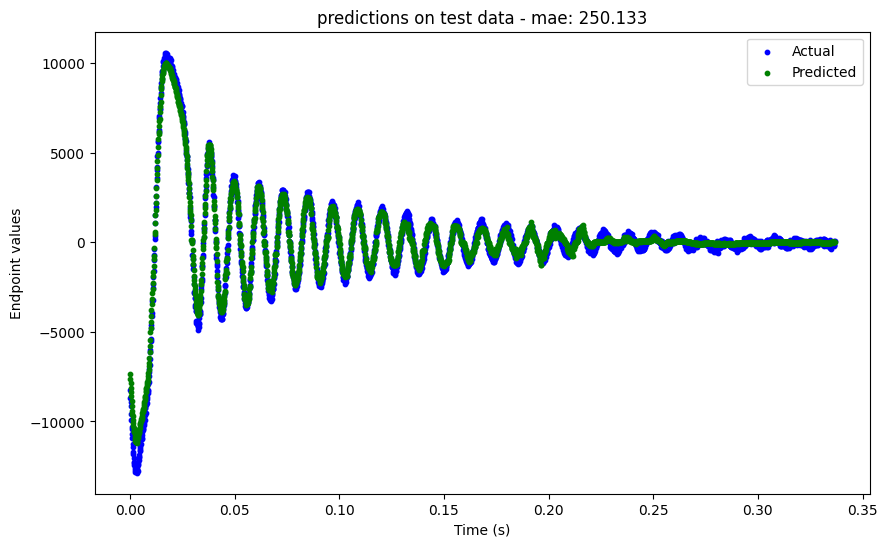

In [108]:
mae_reference = mae(y_target_one_trial.flatten(), 0) #for reference, this is the value we would get if model predicts 0 every time. 

print(f"mae reference: {mae_reference:.3f}")

outer_history= []
mae_test_array = []
for i in range(70):
    print(f"epoch {70 + i}")

    
    history = model.fit(X, output_norm(y), epochs=4, batch_size=32, validation_data = (X_test, output_norm(y_test))) #with output norm
    # history = model.fit(X, y, epochs=2, batch_size=32, validation_data = (X_test, y_test)) #without output norm
    outer_history.append(history.history)

    times = np.array(range(len(X_test_one_trial))) / 8000

    predictions_one_trial_raw = model.predict(X_test_one_trial)

    predictions_one_trial_inversed = inverse_output_norm(predictions_one_trial_raw).numpy() #with output norm
    # predictions_one_trial_inversed = predictions_one_trial_raw #without output norm

    predictions_one_trial_actual = predictions_one_trial_inversed
    #adding predictions to mean target to get actual prediction value:
    # predictions_one_trial_actual = predictions_one_trial_inversed + y_mean_one_trial 
    
    mae_test = mae(y_target_one_trial.flatten(), predictions_one_trial_actual.flatten())
    mae_test_array.append(mae_test.numpy())
    # mae_test = mae(y_test_one_trial.flatten(), inverse_output_norm(inverse_mapping_func(predictions_one_trial)).numpy().flatten())

    # Visualize predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(times, y_target_one_trial.flatten(), color='blue', label='Actual', s = 10)
    plt.scatter(times, predictions_one_trial_actual.flatten(), color='green', label='Predicted', s=10)
    # plt.scatter(times, inverse_output_norm(inverse_mapping_func(predictions_one_trial)).numpy(), color='green', label='Predicted', s=10)


    # plt.title(f'predictions on test data - RMSE: {rmse_test:.3f}')
    plt.title(f'predictions on test data - mae: {mae_test:.3f}')

    plt.xlabel('Time (s)')
    plt.ylabel('Endpoint values')
    plt.legend()
    plt.show()

411/411 [==============================] - 0s 992us/step


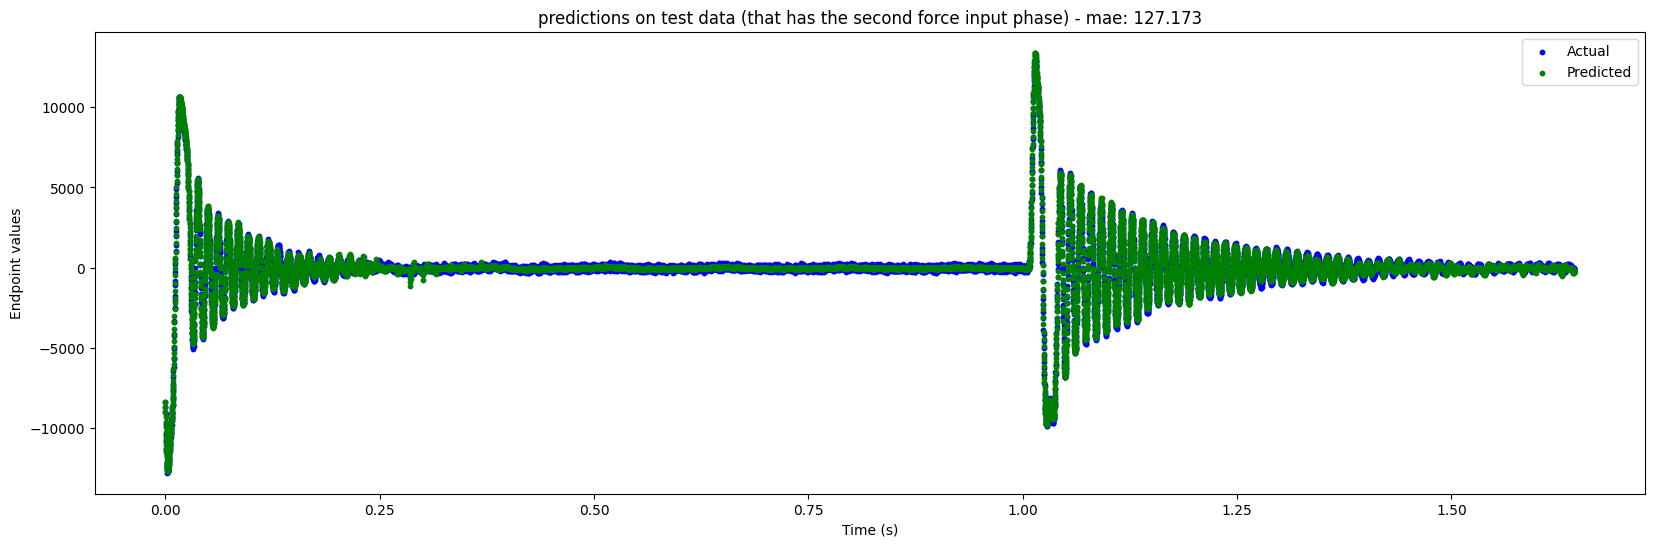

In [98]:
#not with dropout
times = np.array(range(len(X_test_one_trial))) / 8000

predictions_one_trial_raw = model.predict(X_test_one_trial)

predictions_one_trial_inversed = inverse_output_norm(predictions_one_trial_raw).numpy() #with output norm

predictions_one_trial_actual = predictions_one_trial_inversed

mae_test = mae(y_target_one_trial.flatten(), predictions_one_trial_actual.flatten())

# Visualize predictions vs actual values
plt.figure(figsize=(20, 6))
plt.scatter(times, y_target_one_trial.flatten(), color='blue', label='Actual', s = 10)
plt.scatter(times, predictions_one_trial_actual.flatten(), color='green', label='Predicted', s=10)

# plt.title(f'predictions on test data - RMSE: {rmse_test:.3f}')
plt.title(f'predictions on test data (that has the second force input phase) - mae: {mae_test:.3f}')

plt.xlabel('Time (s)')
plt.ylabel('Endpoint values')
plt.legend()
plt.show()

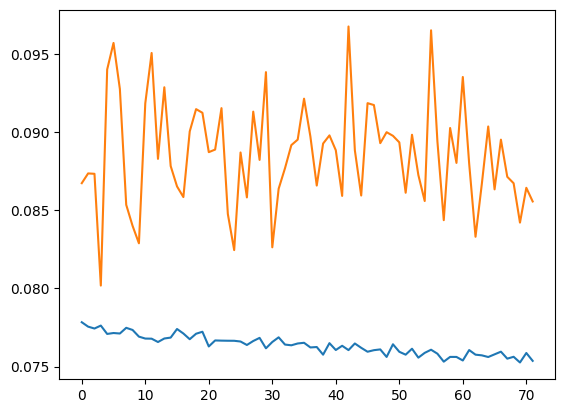

In [110]:
plt.plot(np.array([i["mae"] for i in outer_history[::4]]).flatten(), label = "train")
plt.plot(np.array([i["val_mae"] for i in outer_history[::4]]).flatten(), label = "test")

In [105]:
outer_history_0_100_full_with_dropout = outer_history.copy()
mae_test_array_0_100_full_with_dropout = mae_test_array.copy()

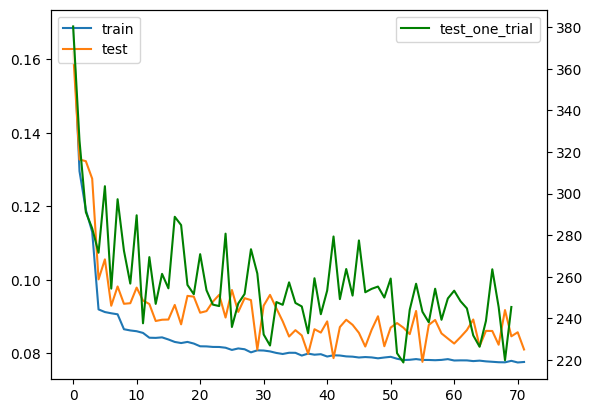

In [106]:
#0 -> 70 outer epochs (4 inner epochs each) with full samples (not truncated to 7500), with dropout layers

plt.plot(np.array([i["mae"] for i in outer_history_0_100_full_with_dropout[::4]]).flatten(), label = "train")
plt.plot(np.array([i["val_mae"] for i in outer_history_0_100_full_with_dropout[::4]]).flatten(), label = "test")

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(mae_test_array_0_100_full_with_dropout, label="test_one_trial", color='green')

# ax2.plot(mae_test_array_0_100, label = "test_one_trial")
# plt.plot(mae_test_array_0_100, label = "test_one_trial")

# Adding legends for both the primary and secondary y-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

Text(0.5, 1.0, 'Feature importances (with dropout layers)')

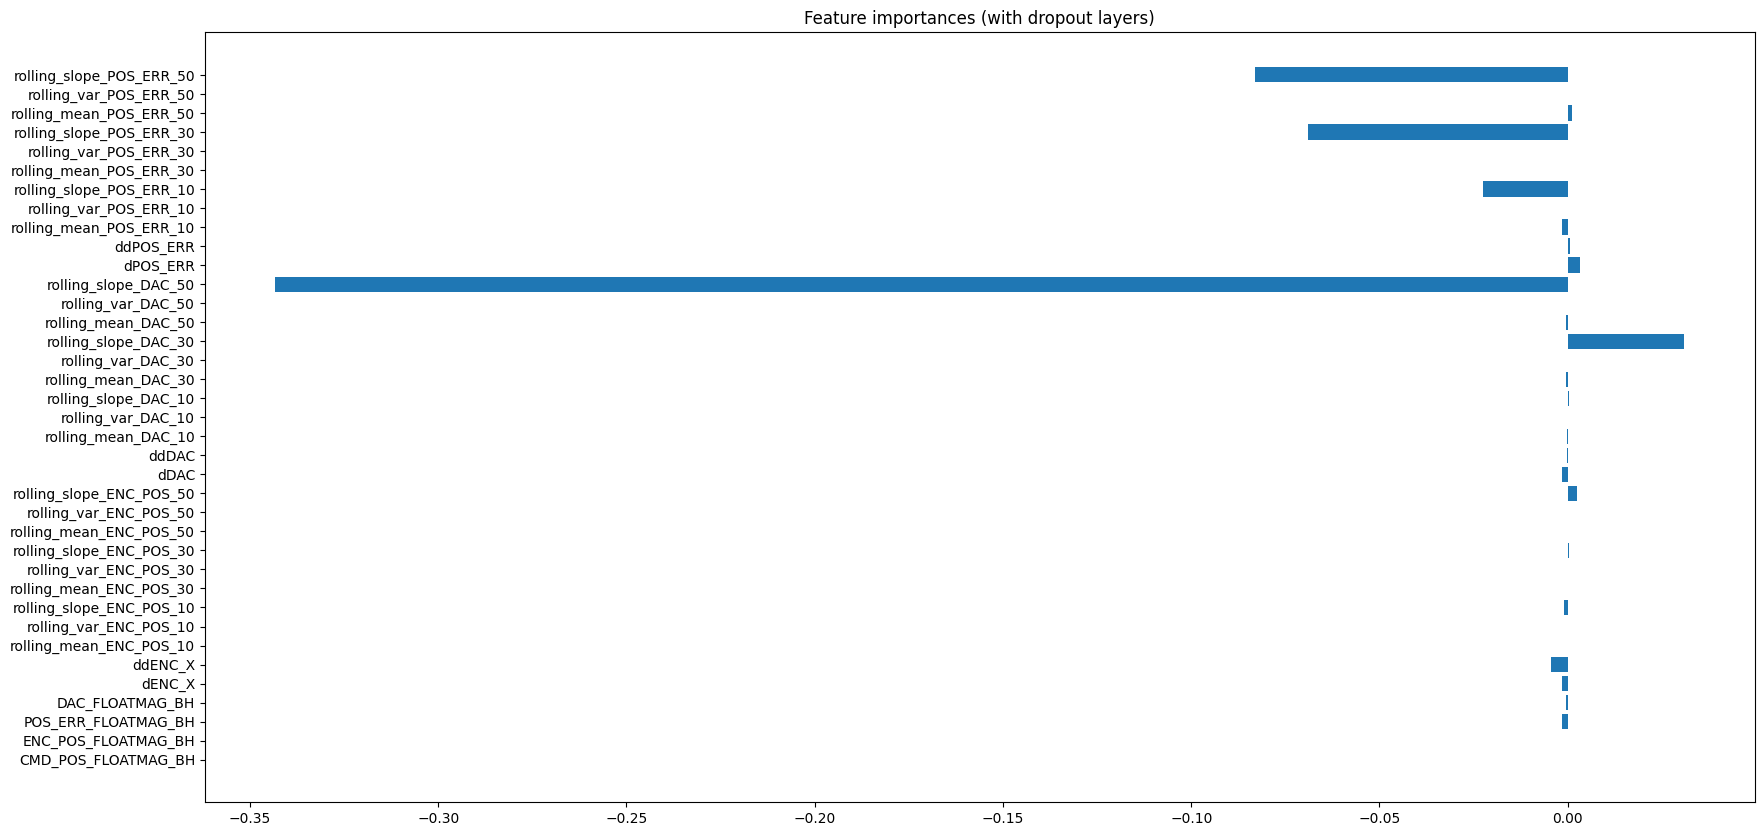

In [107]:
input_data_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)

with tf.GradientTape() as tape:
    # Watch the input tensor
    tape.watch(input_data_tensor)
    # Get the model's prediction for the input
    predictions = model(input_data_tensor)

# Compute the gradients of outputs with respect to inputs
gradients = tape.gradient(predictions, input_data_tensor)

plt.figure(figsize = (20, 10))
plt.barh(X_test.columns, np.mean(gradients, axis = 0))
plt.title("Feature importances (with dropout layers)")

In [58]:
outer_history_0_100_full = outer_history.copy()
mae_test_array_0_100_full = mae_test_array.copy()

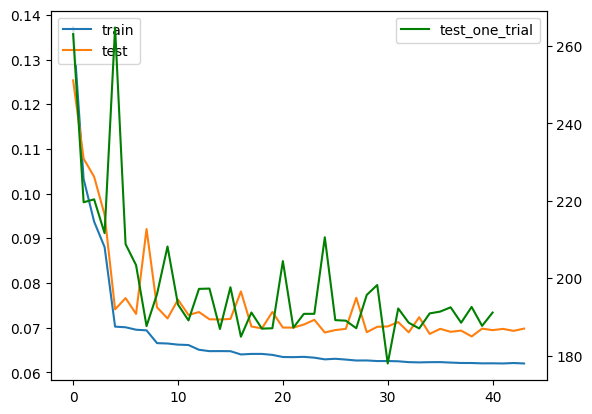

In [59]:
#0 -> 100 outer epochs (4 inner epochs each) with full samples (not truncated to 7500)

plt.plot(np.array([i["mae"] for i in outer_history_0_100_full[::4]]).flatten(), label = "train")
plt.plot(np.array([i["val_mae"] for i in outer_history_0_100_full[::4]]).flatten(), label = "test")

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(mae_test_array_0_100_full, label="test_one_trial", color='green')

# ax2.plot(mae_test_array_0_100, label = "test_one_trial")
# plt.plot(mae_test_array_0_100, label = "test_one_trial")

# Adding legends for both the primary and secondary y-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [85]:
input_data_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)

with tf.GradientTape() as tape:
    # Watch the input tensor
    tape.watch(input_data_tensor)
    # Get the model's prediction for the input
    predictions = model(input_data_tensor)

# Compute the gradients of outputs with respect to inputs
gradients = tape.gradient(predictions, input_data_tensor)

Text(0.5, 1.0, 'Feature importances')

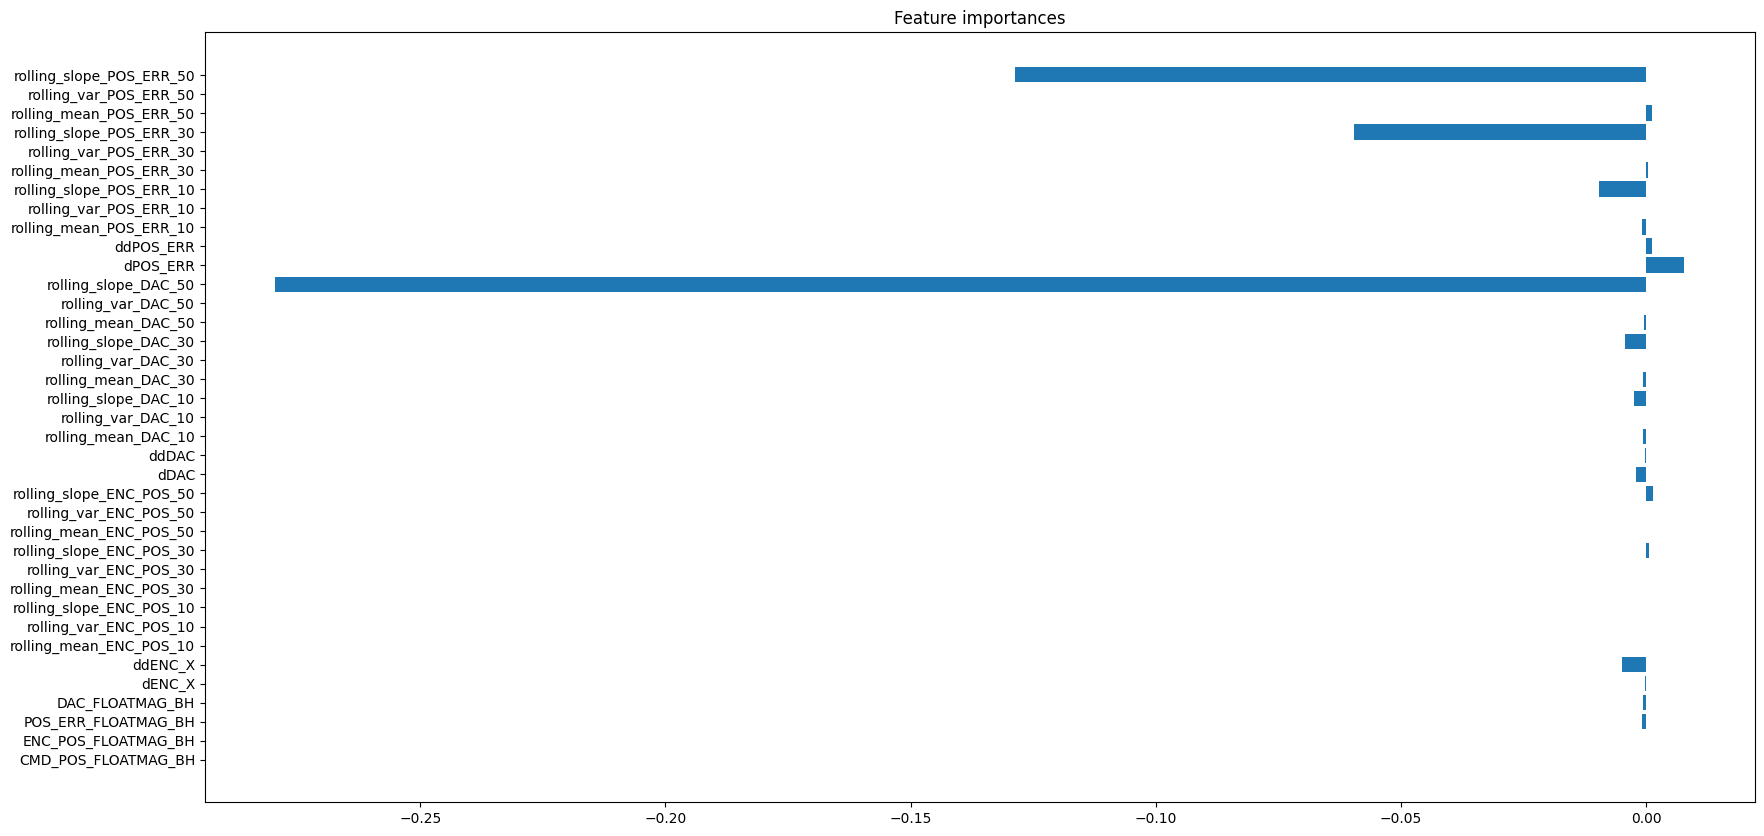

In [86]:
plt.figure(figsize = (20, 10))
plt.barh(X_test.columns, np.mean(gradients, axis = 0))
plt.title("Feature importances")

In [53]:
outer_history_0_100_less_than_7500 = outer_history.copy()
mae_test_array_0_100_less_than_7500 = mae_test_array.copy()

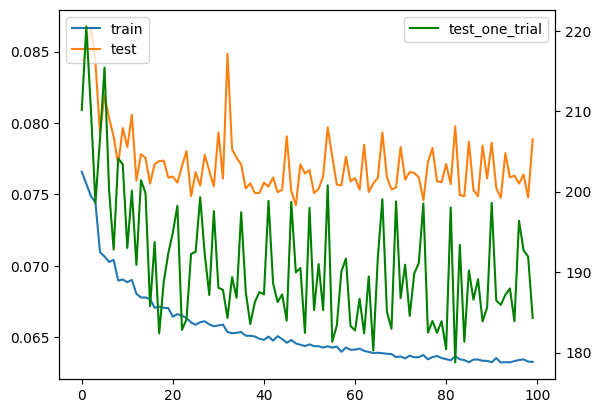

In [54]:
#0 -> 100 outer epochs (4 inner epochs each), (for data truncated to 7500 samples)

plt.plot(np.array([i["mae"] for i in outer_history_0_100_less_than_7500[::4]]).flatten(), label = "train")
plt.plot(np.array([i["val_mae"] for i in outer_history_0_100_less_than_7500[::4]]).flatten(), label = "test")

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(mae_test_array_0_100_less_than_7500, label="test_one_trial", color='green')

# ax2.plot(mae_test_array_0_100, label = "test_one_trial")
# plt.plot(mae_test_array_0_100, label = "test_one_trial")

# Adding legends for both the primary and secondary y-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')